**Suppressing Warnings in Python**

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

**Printing Column Names from a DataFrame**

In [2]:
import pandas as pd
import os

# Import the dataset into a Pandas DataFrame
file_path = '6089_source_data.csv'
if os.path.exists(file_path):
    try:
        df = pd.read_csv(file_path)
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except pd.errors.ParserError:
        print("Error: The file could not be parsed.")

    # Print the column names
    print("Column Names:")
    print(df.columns.tolist())

    # Check for missing or duplicated column names
    if df.columns.hasnans:
        print("Warning: There are missing column names.")
    if df.columns.duplicated().any():
        print("Warning: There are duplicated column names.")
else:
    print(f"Error: The file at {file_path} was not found.")

Column Names:
['srcStateName', 'srcYear', 'GENDER', 'Type of disease', 'Cases', 'Deaths', 'YearCode', 'Year']


**Analyzing DataFrame and Selected Columns**

In [3]:
selected_columns = ['srcStateName', 'srcYear', 'Type of disease', 'Cases', 'Deaths']
if all(col in df.columns for col in selected_columns):
    selected_df = df[selected_columns]
else:
    missing_cols = [col for col in selected_columns if col not in df.columns]
    print(f"Error: The following columns are missing from the dataset: {missing_cols}")

print("\nUnique Values in Categorical Columns:")
for col in ['srcStateName', 'Type of disease']:
    print(f"{col}: {selected_df[col].nunique()} unique values")

missing_values = selected_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

print("\nAll Unique Values in Categorical Columns:")
for col in ['srcStateName', 'Type of disease']:
    print(f"Unique values in {col}: {selected_df[col].unique()}")


Unique Values in Categorical Columns:
srcStateName: 38 unique values
Type of disease: 25 unique values

Missing Values:
srcStateName         0
srcYear              0
Type of disease      0
Cases              682
Deaths             926
dtype: int64

All Unique Values in Categorical Columns:
Unique values in srcStateName: ['Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram'
 'Nagaland' 'Odisha' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttarakhand' 'Uttar Pradesh' 'West Bengal'
 'Andaman and Nicobar Islands' 'Chandigarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Lakshadweep' 'Puducherry' 'Andhra Pradesh'
 'Jammu Div.' 'Kashmir Div.']
Unique values in Type of disease: ['Malaria' 'Kala-azar' 'Acute Encephalitis Syndrome' 'Dengue'
 'Japanese Encephalitis' 'Chikungunya' 'Cholera'
 'Acute Diarrhoeal

**Visualization of Data for Cases and Deaths**

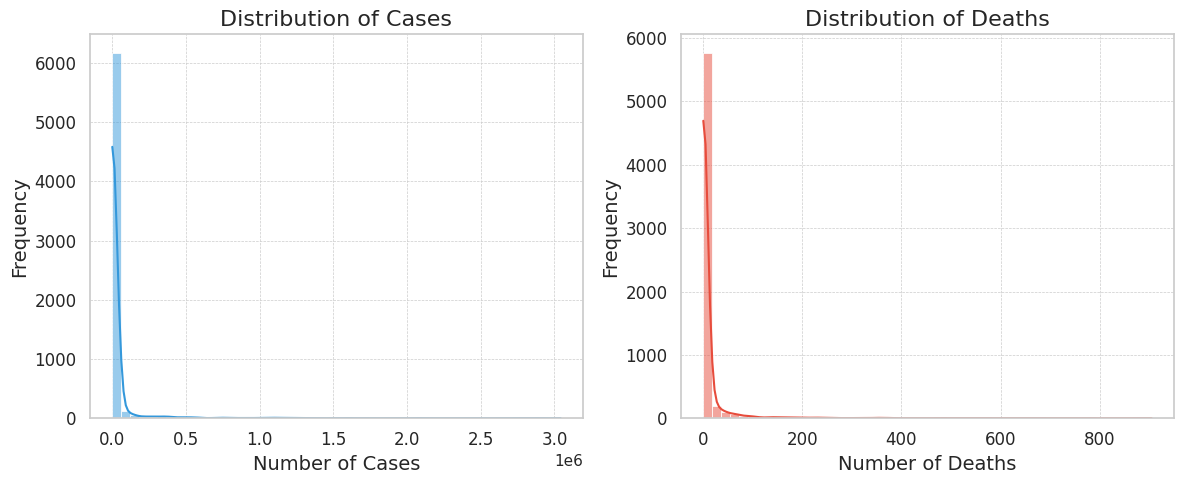

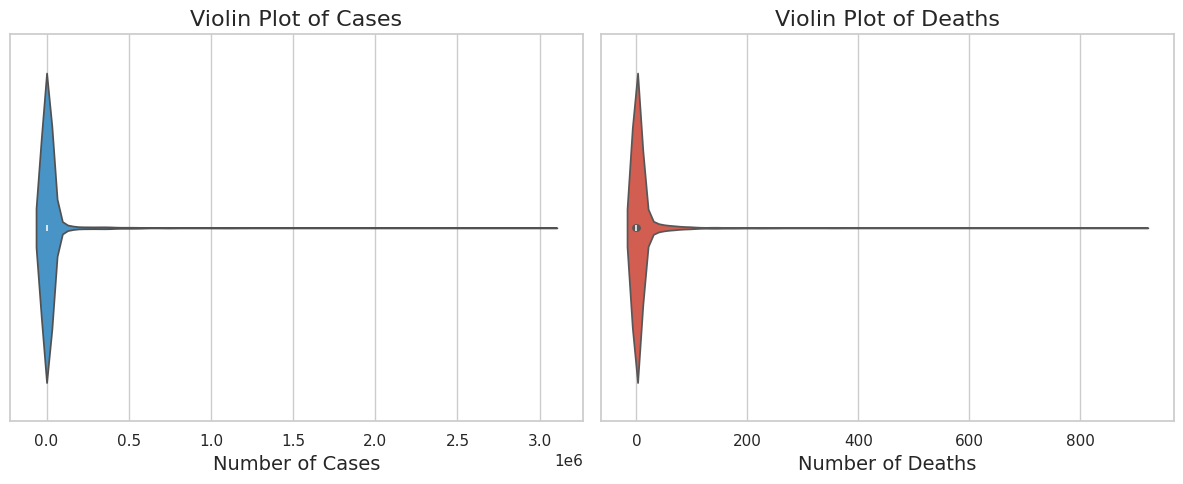

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style
sns.set(style="whitegrid")

# Custom colors
cases_color = "#3498db"
deaths_color = "#e74c3c"

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for 'Cases'
sns.histplot(selected_df['Cases'], bins=50, kde=True, color=cases_color, ax=axes[0])
axes[0].set_title('Distribution of Cases', fontsize=16)
axes[0].set_xlabel('Number of Cases', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Histogram for 'Deaths'
sns.histplot(selected_df['Deaths'], bins=50, kde=True, color=deaths_color, ax=axes[1])
axes[1].set_title('Distribution of Deaths', fontsize=16)
axes[1].set_xlabel('Number of Deaths', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

# Creating side-by-side violin plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Violin plot for 'Cases'
sns.violinplot(x=selected_df['Cases'], color=cases_color, ax=axes[0])
axes[0].set_title('Violin Plot of Cases', fontsize=16)
axes[0].set_xlabel('Number of Cases', fontsize=14)

# Violin plot for 'Deaths'
sns.violinplot(x=selected_df['Deaths'], color=deaths_color, ax=axes[1])
axes[1].set_title('Violin Plot of Deaths', fontsize=16)
axes[1].set_xlabel('Number of Deaths', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

**Comparison of Dataset Statistics Before and After Handling Missing Values**

In [5]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Drop rows with missing values
df_copy.dropna(inplace=True)

# Display statistics of the original DataFrame
print("Original DataFrame Statistics:")
print(df.describe())

# Display statistics of the DataFrame with missing values dropped
print("\nDataFrame with Missing Values Dropped Statistics:")
print(df_copy.describe())

missing_percentage = df.isnull().mean() * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

Original DataFrame Statistics:
           srcYear         Cases       Deaths     YearCode
count  7272.000000  6.590000e+03  6346.000000  7272.000000
mean   2018.069307  3.270421e+04    10.559408  2018.069307
std       1.725052  1.856415e+05    48.397491     1.725052
min    2011.000000  0.000000e+00     0.000000  2011.000000
25%    2017.000000  1.000000e+00     0.000000  2017.000000
50%    2018.000000  6.000000e+01     0.000000  2018.000000
75%    2019.000000  1.198250e+03     2.000000  2019.000000
max    2022.000000  3.041295e+06   905.000000  2022.000000

DataFrame with Missing Values Dropped Statistics:
           srcYear         Cases       Deaths     YearCode
count  4662.000000  4.662000e+03  4662.000000  4662.000000
mean   2018.354783  4.480640e+04     9.804376  2018.354783
std       1.106551  2.191443e+05    44.716676     1.106551
min    2017.000000  0.000000e+00     0.000000  2017.000000
25%    2017.000000  3.000000e+00     0.000000  2017.000000
50%    2018.000000  7.300000e+01 

**Installing Required Library**

In [6]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=054c2cfad49655c3873a5a9441ba57900de50154db86c3d831141e9e559c8c84
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=acf30f90d1c8ab4bdb60f58fa4b5f7c9a4e51277944d05e3ecb07a4c476b6b8c
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


**Data Imputation**

In [7]:
import pandas as pd
from fancyimpute import IterativeImputer
import numpy as np

# Load data from the CSV file
df = pd.read_csv('6089_source_data.csv')

# Drop duplicate rows if any
df = df.drop_duplicates()

# Ensure data types are consistent
df['srcYear'] = df['srcYear'].astype(int)
df['Cases'] = pd.to_numeric(df['Cases'], errors='coerce')
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')

# Initialize the Iterative Imputer (MICE)
mice_imputer = IterativeImputer(max_iter=100, tol=1e-15, random_state=0, verbose=5)

# Impute the missing values for 'Cases' and 'Deaths'
df[['Cases', 'Deaths']] = mice_imputer.fit_transform(df[['Cases', 'Deaths']])

# Save the updated DataFrame to a CSV file
df.to_csv('6089_source_data_1.csv', index=False)

# Read the updated dataset
data = pd.read_csv("6089_source_data_1.csv")

# Define all possible years, diseases, and states/union territories
years = list(range(2011, 2023))  # 2011 to 2022
diseases = data['Type of disease'].unique()
states = data['srcStateName'].unique()

# Create a template DataFrame with all possible combinations
template = pd.DataFrame([(year, disease, state) for year in years for disease in diseases for state in states], columns=['srcYear', 'Type of disease', 'srcStateName'])

# Merge the template with existing data to fill in missing values
filled_data = pd.merge(template, data, on=['srcYear', 'Type of disease', 'srcStateName'], how='left')

# Sort values by Year
filled_data = filled_data.sort_values(by=['srcStateName', 'Type of disease', 'srcYear'])

# Interpolate missing values for Cases and Deaths
filled_data['Cases'] = filled_data.groupby(['Type of disease', 'srcStateName'])['Cases'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))
filled_data['Deaths'] = filled_data.groupby(['Type of disease', 'srcStateName'])['Deaths'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

# Replace NaN values with 0 for both "Cases" and "Deaths" columns
filled_data['Cases'] = filled_data['Cases'].fillna(0)
filled_data['Deaths'] = filled_data['Deaths'].fillna(0)

# Handle missing values for GENDER
filled_data['GENDER'] = filled_data['GENDER'].fillna('Unknown')

# Remove unnecessary columns if they were mistakenly added
filled_data = filled_data.drop(columns=['YearCode', 'Year'], errors='ignore')

# Write the filled dataset to a new CSV file
filled_data.to_csv("6089_source_data_1.csv", index=False)

print("\nUpdated DataFrame after Imputation and Filling:")
print(filled_data)

# Verify the imputed values
missing_values_after_imputation = filled_data.isnull().sum()
print("\nMissing values after imputation and filling:")
print(missing_values_after_imputation)

# Additional checks to ensure data quality
print("\nData types:")
print(filled_data.dtypes)

print("\nChecking for extreme values in 'Cases' and 'Deaths':")
print(filled_data[['Cases', 'Deaths']].describe())

[IterativeImputer] Completing matrix with shape (7272, 2)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.03
[IterativeImputer] Change: 2.4281813533195695, scaled tolerance: 3.0412950000000003e-09 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.04
[IterativeImputer] Change: 3.637978807091713e-12, scaled tolerance: 3.0412950000000003e-09 
[IterativeImputer] Early stopping criterion reached.

Updated DataFrame after Imputation and Filling:
       srcYear            Type of disease                 srcStateName  \
294       2011  Acute Diarrhoeal Diseases  Andaman and Nicobar Islands   
1244      2012  Acute Diarrhoeal Diseases  Andaman and Nicobar Islands   
2194      2013  Acute Diarrhoeal Diseases  Andaman and Nicobar Islands   
3144      2014  Acute Diarrhoeal Diseases  Andaman and Nicobar Islands   
4094      2015  Acute Diarrhoeal Diseases  Andaman and Nicobar Islands   
...        ...                        ...                          ...   
9889 

**Cross Verification**

In [8]:
import pandas as pd

# Load the updated dataset
filled_data = pd.read_csv("6089_source_data_1.csv")

# Create a pivot table to count unique diseases for each state
disease_count = filled_data.pivot_table(
    index='srcStateName',
    columns='Type of disease',
    values='Cases',
    aggfunc='size',
    fill_value=0
)

# Count the number of unique diseases for each state
disease_count_per_state = disease_count[disease_count > 0].count(axis=1)

# Check if all states have all 25 diseases
all_states_have_all_diseases = disease_count_per_state[disease_count_per_state == 25]

if len(all_states_have_all_diseases) == 38:
    print("All states have all 25 diseases.")
else:
    missing_states = disease_count_per_state[disease_count_per_state < 25]
    print("States missing some diseases:")
    print(missing_states)

All states have all 25 diseases.


**Visualization of Imputed Dataset**

Skewness of Cases: 9.868174804028438
Skewness of Deaths: 9.827340511245529


<Figure size 1200x600 with 0 Axes>

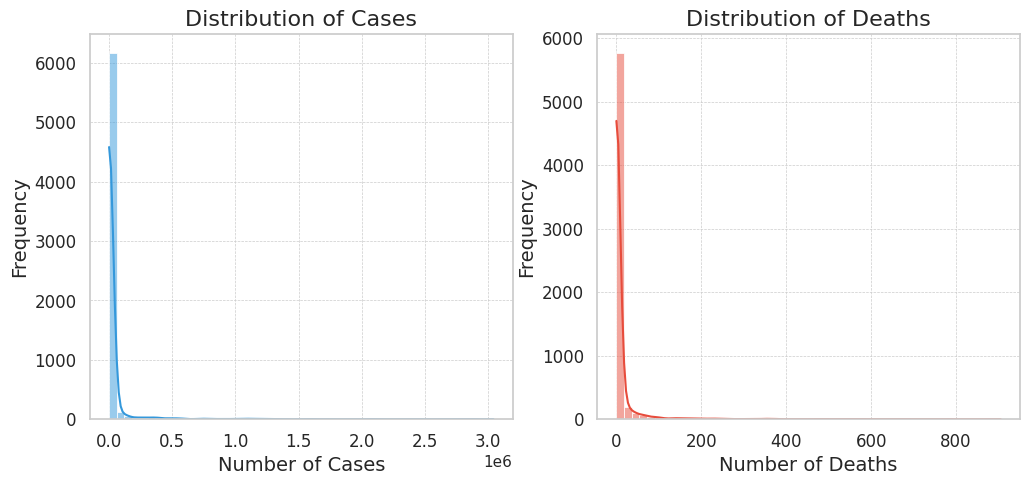

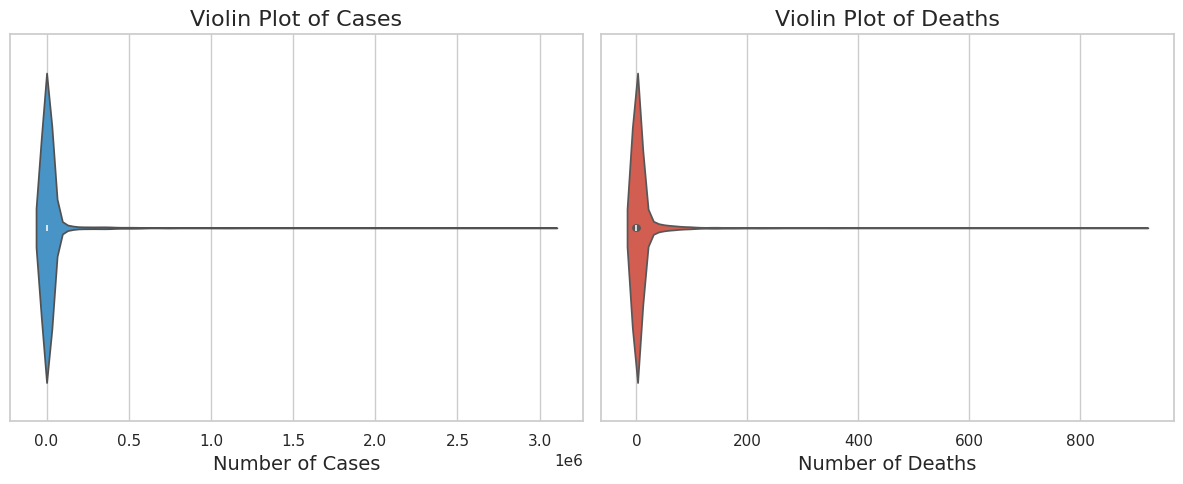

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load the updated dataset
filled_data = pd.read_csv("6089_source_data_1.csv")

# Drop duplicate rows if any
filled_data = filled_data.drop_duplicates()

# Ensure data types are consistent
filled_data['Cases'] = pd.to_numeric(filled_data['Cases'], errors='coerce')
filled_data['Deaths'] = pd.to_numeric(filled_data['Deaths'], errors='coerce')

# Plot histograms for Cases and Deaths
plt.figure(figsize=(12, 6))

# Calculate and print skewness
cases_skewness = skew(filled_data['Cases'].dropna())
deaths_skewness = skew(filled_data['Deaths'].dropna())

print(f'Skewness of Cases: {cases_skewness}')
print(f'Skewness of Deaths: {deaths_skewness}')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for 'Cases'
sns.histplot(selected_df['Cases'], bins=50, kde=True, color=cases_color, ax=axes[0])
axes[0].set_title('Distribution of Cases', fontsize=16)
axes[0].set_xlabel('Number of Cases', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Histogram for 'Deaths'
sns.histplot(selected_df['Deaths'], bins=50, kde=True, color=deaths_color, ax=axes[1])
axes[1].set_title('Distribution of Deaths', fontsize=16)
axes[1].set_xlabel('Number of Deaths', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Creating side-by-side violin plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Violin plot for 'Cases'
sns.violinplot(x=selected_df['Cases'], color=cases_color, ax=axes[0])
axes[0].set_title('Violin Plot of Cases', fontsize=16)
axes[0].set_xlabel('Number of Cases', fontsize=14)

# Violin plot for 'Deaths'
sns.violinplot(x=selected_df['Deaths'], color=deaths_color, ax=axes[1])
axes[1].set_title('Violin Plot of Deaths', fontsize=16)
axes[1].set_xlabel('Number of Deaths', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

**Transformation of Data**

Spearman's Rank Correlation: 0.57
P-value: 0.0000


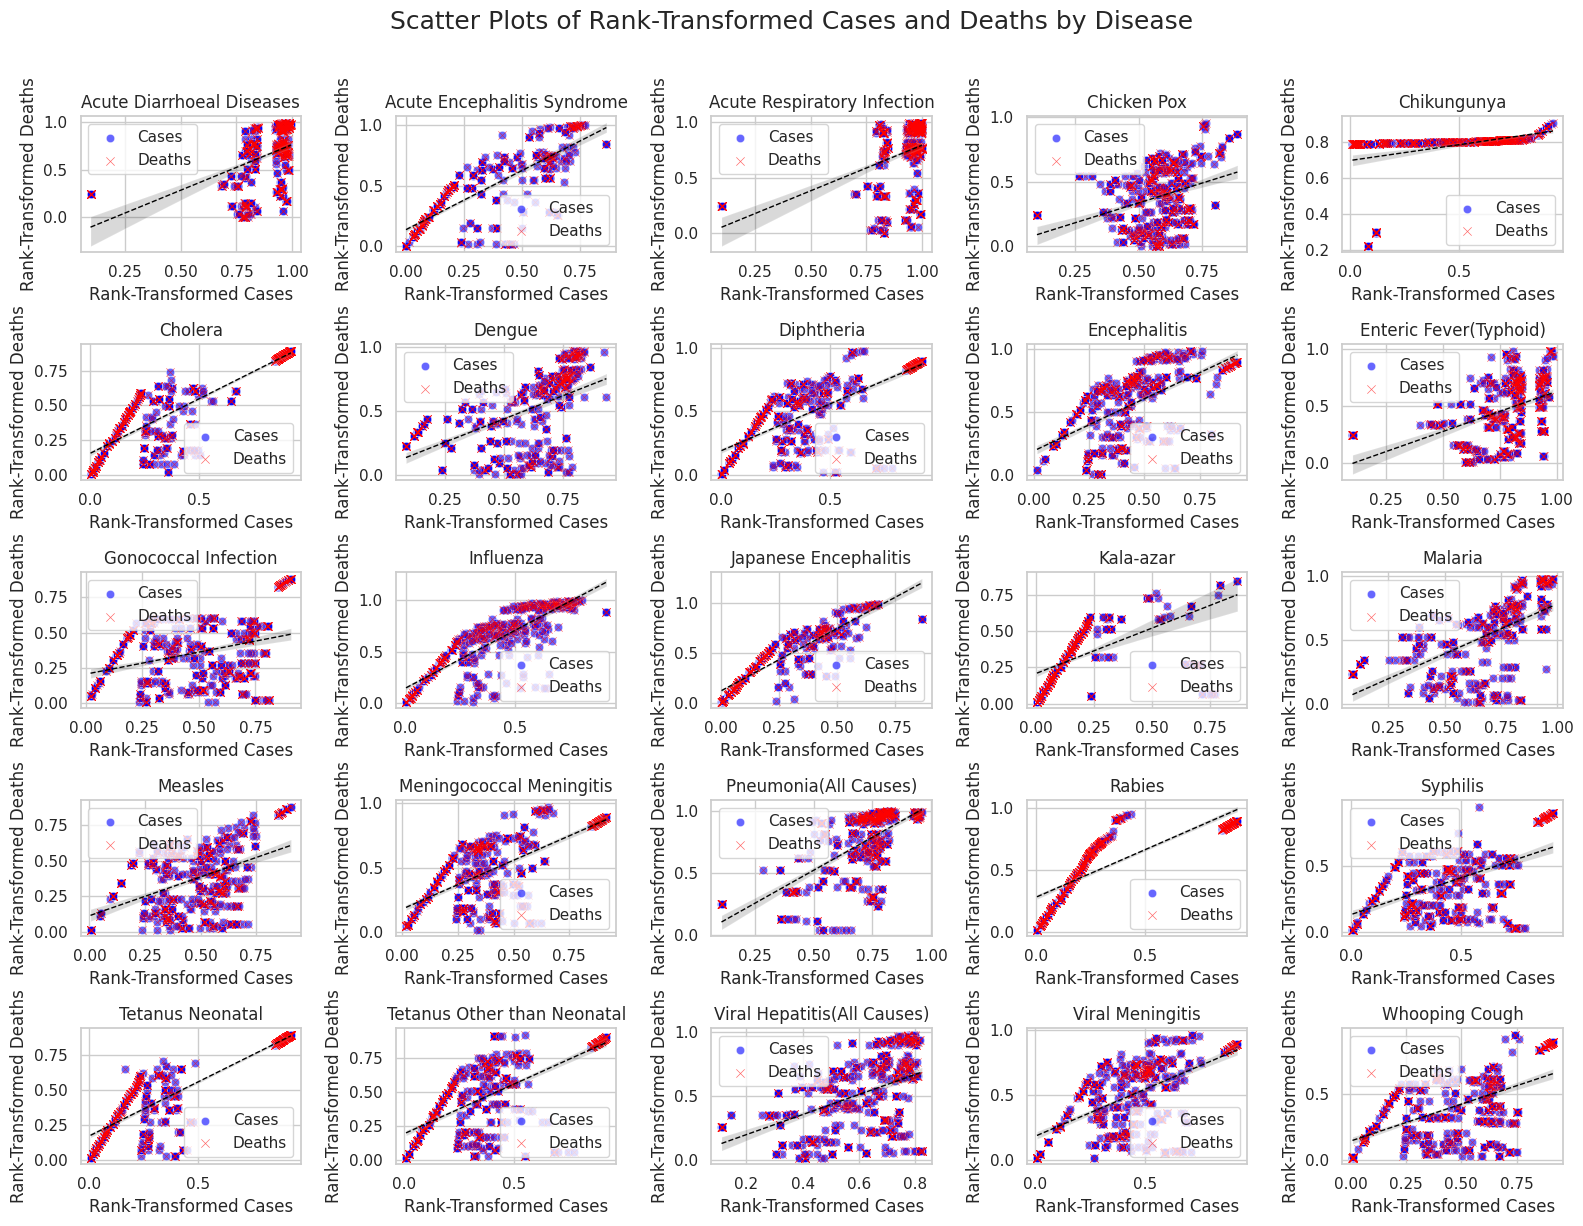

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

# Load the data
data = pd.read_csv("6089_source_data_1.csv")

# Define rank transformation function
def rank_transform(x):
    return (pd.Series(np.argsort(np.argsort(x.squeeze(), kind='mergesort')), index=x.index) / (len(x) - 1))

# Apply rank transformation on Cases and Deaths columns
rank_transformer = FunctionTransformer(rank_transform, validate=False)
data['Cases'] = rank_transformer.fit_transform(data[['Cases']])
data['Deaths'] = rank_transformer.fit_transform(data[['Deaths']])

# Save rank-transformed values into a new CSV file
data.to_csv("6089_source_data_2.csv", index=False)

# Calculate Spearman's rank correlation
spearman_corr, p_value = spearmanr(data['Cases'], data['Deaths'])

# Print the correlation coefficient and p-value
print(f"Spearman's Rank Correlation: {spearman_corr:.2f}")
print(f"P-value: {p_value:.4f}")

# Get unique diseases
diseases = data['Type of disease'].unique()

# Determine grid size for subplots
num_diseases = len(diseases)
grid_size = int(np.ceil(np.sqrt(num_diseases)))

# Plot the rank-transformed data in subplots
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

for i, disease in enumerate(diseases, 1):
    plt.subplot(grid_size, grid_size, i)
    disease_data = data[data['Type of disease'] == disease]

    # Scatter plot for Cases
    sns.scatterplot(x='Cases', y='Deaths', data=disease_data, color='blue', marker='o', label='Cases', alpha=0.6)

    # Scatter plot for Deaths
    sns.scatterplot(x='Cases', y='Deaths', data=disease_data, color='red', marker='x', label='Deaths', alpha=0.6)

    # Add regression lines for both
    sns.regplot(x='Cases', y='Deaths', data=disease_data, scatter=False, color='black', line_kws={"linewidth": 1, "linestyle": "dashed"})

    plt.title(disease)
    plt.xlabel('Rank-Transformed Cases')
    plt.ylabel('Rank-Transformed Deaths')
    plt.legend()
    plt.tight_layout()

plt.suptitle('Scatter Plots of Rank-Transformed Cases and Deaths by Disease', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

**Bootstrap Distribution of Mean for Cases and Deaths**

Bootstrap Mean Confidence Interval for 'Cases': [0.50, 0.50]
Bootstrap Mean Confidence Interval for 'Deaths': [0.50, 0.50]


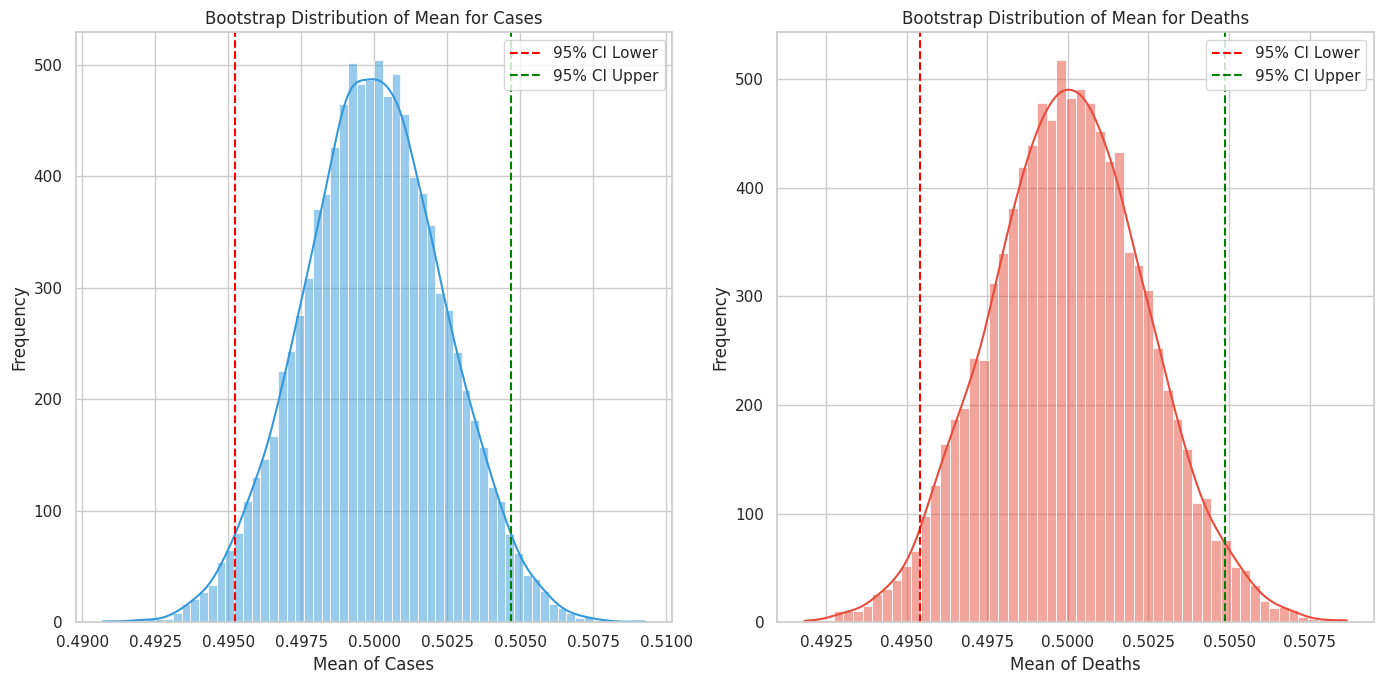

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the final_data.csv file
final_data = pd.read_csv("6089_source_data_2.csv")

# Extract 'Cases' and 'Deaths' data
cases_data = final_data['Cases'].dropna().values
deaths_data = final_data['Deaths'].dropna().values

# Number of bootstrap samples
n_samples = 10000

# Function to perform bootstrapping
def bootstrap_confidence_intervals(data, n_samples=1000):
    bootstrap_means = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(sample))
    bootstrap_means = np.array(bootstrap_means)
    ci_lower = np.percentile(bootstrap_means, 2.5)
    ci_upper = np.percentile(bootstrap_means, 97.5)
    return bootstrap_means, ci_lower, ci_upper

# Calculate confidence intervals for 'Cases'
bootstrap_means_cases, ci_lower_cases, ci_upper_cases = bootstrap_confidence_intervals(cases_data, n_samples)

# Calculate confidence intervals for 'Deaths'
bootstrap_means_deaths, ci_lower_deaths, ci_upper_deaths = bootstrap_confidence_intervals(deaths_data, n_samples)

# Print the results
print("Bootstrap Mean Confidence Interval for 'Cases': [{:.2f}, {:.2f}]".format(ci_lower_cases, ci_upper_cases))
print("Bootstrap Mean Confidence Interval for 'Deaths': [{:.2f}, {:.2f}]".format(ci_lower_deaths, ci_upper_deaths))

# Plot the bootstrap distributions
plt.figure(figsize=(14, 7))

# Plot for 'Cases'
plt.subplot(1, 2, 1)
sns.histplot(bootstrap_means_cases, kde=True, color="#3498db")
plt.axvline(ci_lower_cases, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper_cases, color='green', linestyle='--', label='95% CI Upper')
plt.title('Bootstrap Distribution of Mean for Cases')
plt.xlabel('Mean of Cases')
plt.ylabel('Frequency')
plt.legend()

# Plot for 'Deaths'
plt.subplot(1, 2, 2)
sns.histplot(bootstrap_means_deaths, kde=True, color="#e74c3c")
plt.axvline(ci_lower_deaths, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper_deaths, color='green', linestyle='--', label='95% CI Upper')
plt.title('Bootstrap Distribution of Mean for Deaths')
plt.xlabel('Mean of Deaths')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

**Bootstrap Distribution of Median for Cases and Deathst**

Bootstrap Median Confidence Interval for 'Cases': [0.49, 0.51]
Bootstrap Median Confidence Interval for 'Deaths': [0.49, 0.51]


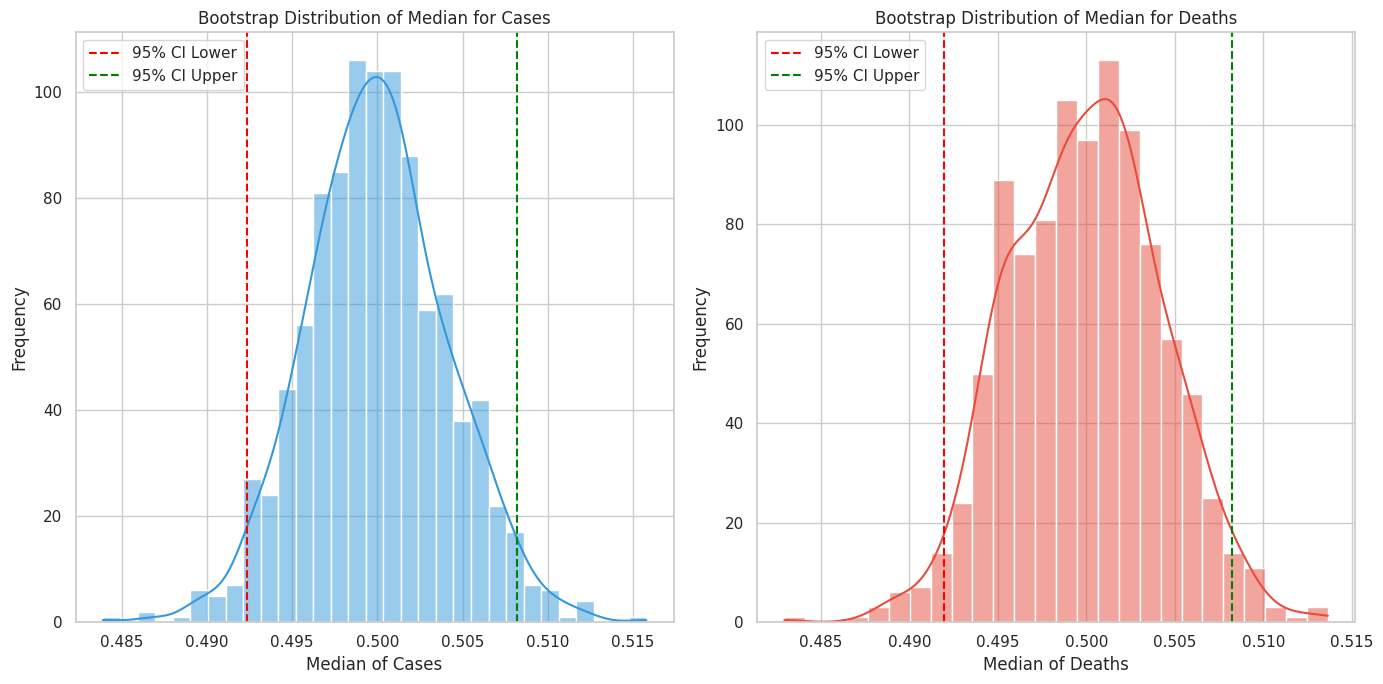

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the final_data.csv file
final_data = pd.read_csv("6089_source_data_2.csv")

# Extract 'Cases' and 'Deaths' data
cases_data = final_data['Cases'].dropna().values
deaths_data = final_data['Deaths'].dropna().values

# Number of bootstrap samples
n_samples = 1000

# Function to perform bootstrapping for median
def bootstrap_median_confidence_intervals(data, n_samples=1000):
    bootstrap_medians = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_medians.append(np.median(sample))
    bootstrap_medians = np.array(bootstrap_medians)
    ci_lower = np.percentile(bootstrap_medians, 2.5)
    ci_upper = np.percentile(bootstrap_medians, 97.5)
    return bootstrap_medians, ci_lower, ci_upper

# Calculate confidence intervals for 'Cases'
bootstrap_medians_cases, ci_lower_cases_median, ci_upper_cases_median = bootstrap_median_confidence_intervals(cases_data)

# Calculate confidence intervals for 'Deaths'
bootstrap_medians_deaths, ci_lower_deaths_median, ci_upper_deaths_median = bootstrap_median_confidence_intervals(deaths_data)

# Print the results
print("Bootstrap Median Confidence Interval for 'Cases': [{:.2f}, {:.2f}]".format(ci_lower_cases_median, ci_upper_cases_median))
print("Bootstrap Median Confidence Interval for 'Deaths': [{:.2f}, {:.2f}]".format(ci_lower_deaths_median, ci_upper_deaths_median))

# Plot the bootstrap distributions
plt.figure(figsize=(14, 7))

# Plot for 'Cases'
plt.subplot(1, 2, 1)
sns.histplot(bootstrap_medians_cases, kde=True, color="#3498db")
plt.axvline(ci_lower_cases_median, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper_cases_median, color='green', linestyle='--', label='95% CI Upper')
plt.title('Bootstrap Distribution of Median for Cases')
plt.xlabel('Median of Cases')
plt.ylabel('Frequency')
plt.legend()

# Plot for 'Deaths'
plt.subplot(1, 2, 2)
sns.histplot(bootstrap_medians_deaths, kde=True, color="#e74c3c")
plt.axvline(ci_lower_deaths_median, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper_deaths_median, color='green', linestyle='--', label='95% CI Upper')
plt.title('Bootstrap Distribution of Median for Deaths')
plt.xlabel('Median of Deaths')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

**KS Test for Distribution Check**

In [13]:
import pandas as pd
from scipy import stats

# Read the final_data.csv file
final_data = pd.read_csv("6089_source_data_2.csv")

# Extract 'Cases' and 'Deaths' data
cases_final = final_data['Cases'].dropna().values
deaths_final = final_data['Deaths'].dropna().values

# Candidate distributions to test
distributions = [
    'expon', 'gamma', 'lognorm', 'pareto', 'weibull_min', 'norm', 't', 'uniform', 'triang', 'chi2'
]

# Function to fit data to distributions and return test statistics
def fit_distributions(data):
    results = {}
    for distribution in distributions:
        try:
            # Fit the data to the distribution
            params = getattr(stats, distribution).fit(data, floc=0)

            # Kolmogorov-Smirnov test
            ks_statistic, ks_p_value = stats.kstest(data, distribution, args=params)

            # Store the results
            results[distribution] = {'params': params, 'ks_statistic': ks_statistic, 'ks_p_value': ks_p_value}
        except Exception as e:
            pass

    return results

# Fit distributions for 'Cases' and 'Deaths'
cases_results = fit_distributions(cases_final)
deaths_results = fit_distributions(deaths_final)

# Print the results for 'Cases'
print("Results for 'Cases':")
for distribution, result in cases_results.items():
    print(f"{distribution}: KS statistic = {result['ks_statistic']}, p-value = {result['ks_p_value']}")

# Print the results for 'Deaths'
print("\nResults for 'Deaths':")
for distribution, result in deaths_results.items():
    print(f"{distribution}: KS statistic = {result['ks_statistic']}, p-value = {result['ks_p_value']}")

Results for 'Cases':
expon: KS statistic = 0.1534510529171984, p-value = 1.223047520638669e-289
pareto: KS statistic = nan, p-value = nan
weibull_min: KS statistic = 0.08202560781334767, p-value = 9.217576806445777e-83
norm: KS statistic = 0.5, p-value = 0.0
t: KS statistic = 0.5, p-value = 0.0
uniform: KS statistic = 7.110352673492605e-05, p-value = 1.0
triang: KS statistic = 0.1387333394367613, p-value = 1.3516036689787198e-236
chi2: KS statistic = 0.09991769842874443, p-value = 1.1080714239612953e-122

Results for 'Deaths':
expon: KS statistic = 0.1534510529171984, p-value = 1.223047520638669e-289
pareto: KS statistic = nan, p-value = nan
weibull_min: KS statistic = 0.08202560781334767, p-value = 9.217576806445777e-83
norm: KS statistic = 0.5, p-value = 0.0
t: KS statistic = 0.5, p-value = 0.0
uniform: KS statistic = 7.110352673492605e-05, p-value = 1.0
triang: KS statistic = 0.1387333394367613, p-value = 1.3516036689787198e-236
chi2: KS statistic = 0.09991769842874443, p-value = 1.

**Skewness of Data**

In [14]:
# Load the filled dataset
filled_data = pd.read_csv("6089_source_data_2.csv")

# Calculate skewness for 'Cases' and 'Deaths'
cases_skewness = skew(filled_data['Cases'])
deaths_skewness = skew(filled_data['Deaths'])

print(f"Skewness for 'Cases': {cases_skewness}")
print(f"Skewness for 'Deaths': {deaths_skewness}")

Skewness for 'Cases': -2.309687695318918e-16
Skewness for 'Deaths': -2.099716086653562e-16


**Correlation Matrix**

Correlation Matrix:
          srcYear     Cases    Deaths
srcYear  1.000000  0.172925  0.094329
Cases    0.172925  1.000000  0.574449
Deaths   0.094329  0.574449  1.000000


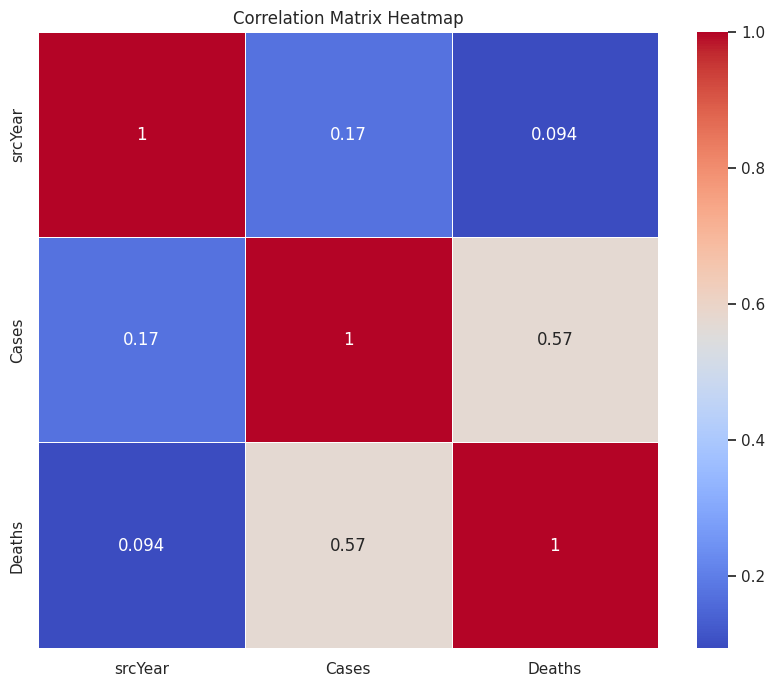

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
final_data = pd.read_csv("6089_source_data_2.csv")

# Select only numerical columns
numerical_columns = final_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Scatter Plot of Cases vs Deaths for each Disease**

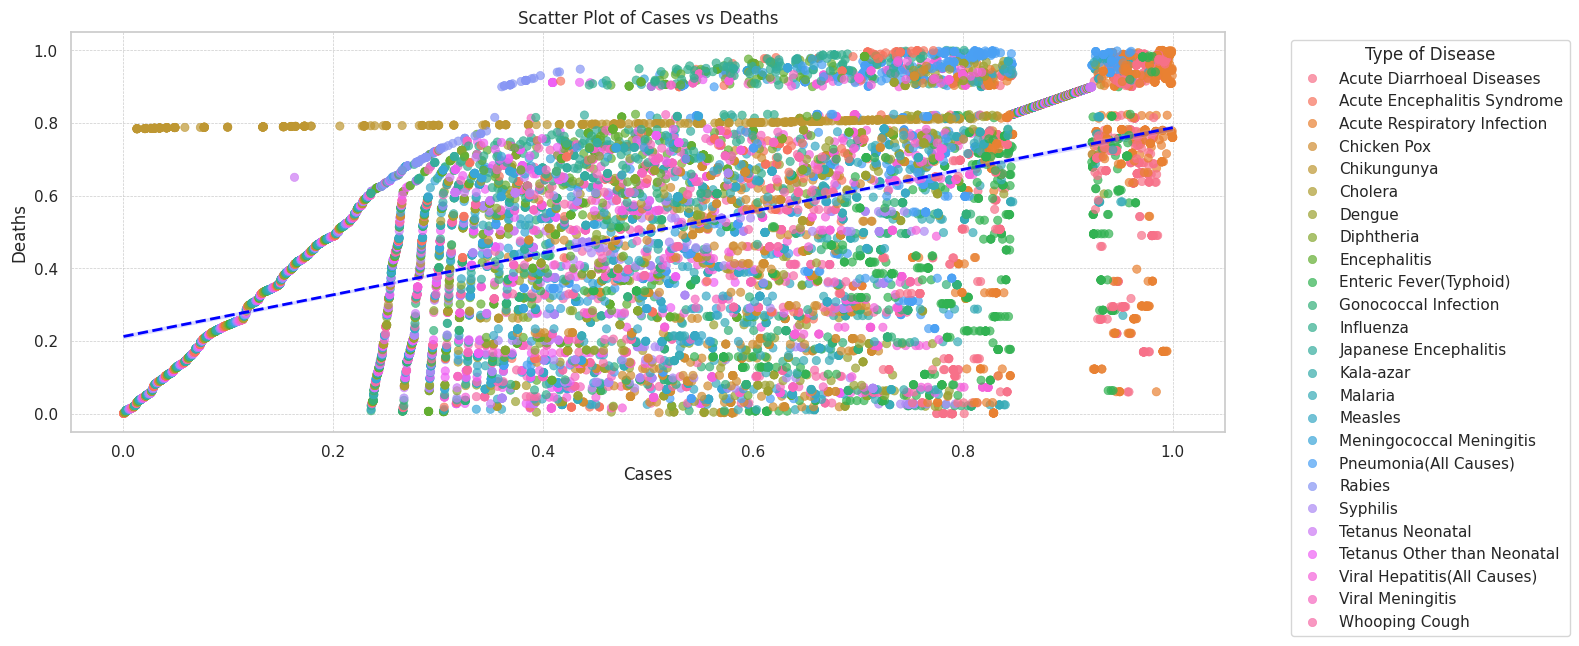

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
final_data = pd.read_csv("6089_source_data_2.csv")

# Scatter plot with regression line
plt.figure(figsize=(16, 6))
sns.scatterplot(data=final_data, x='Cases', y='Deaths', hue='Type of disease', alpha=0.7, edgecolor=None)
sns.regplot(data=final_data, x='Cases', y='Deaths', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Cases vs Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend(title='Type of Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Linear Regression**

Overall Metrics for Cases using Linear Regression:
Overall MSE Cases: 0.04007783801199746
Overall MAE Cases: 0.15320492935728597
Overall R^2 Cases: 0.5262575823644101
Overall RMSE Cases: 0.20019450045392723

Overall Metrics for Deaths using Linear Regression:
Overall MSE Deaths: 0.05309454734088129
Overall MAE Deaths: 0.18369601942118352
Overall R^2 Deaths: 0.3623991612178905
Overall RMSE Deaths: 0.23042254086977101


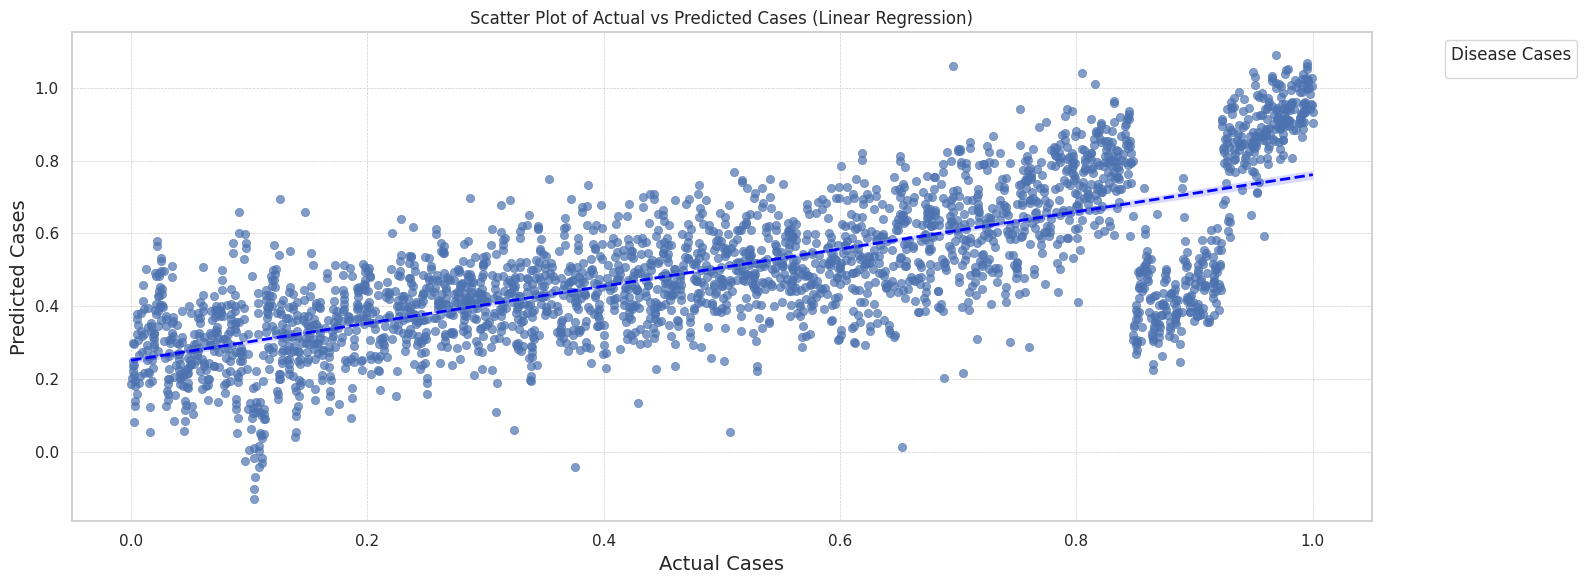

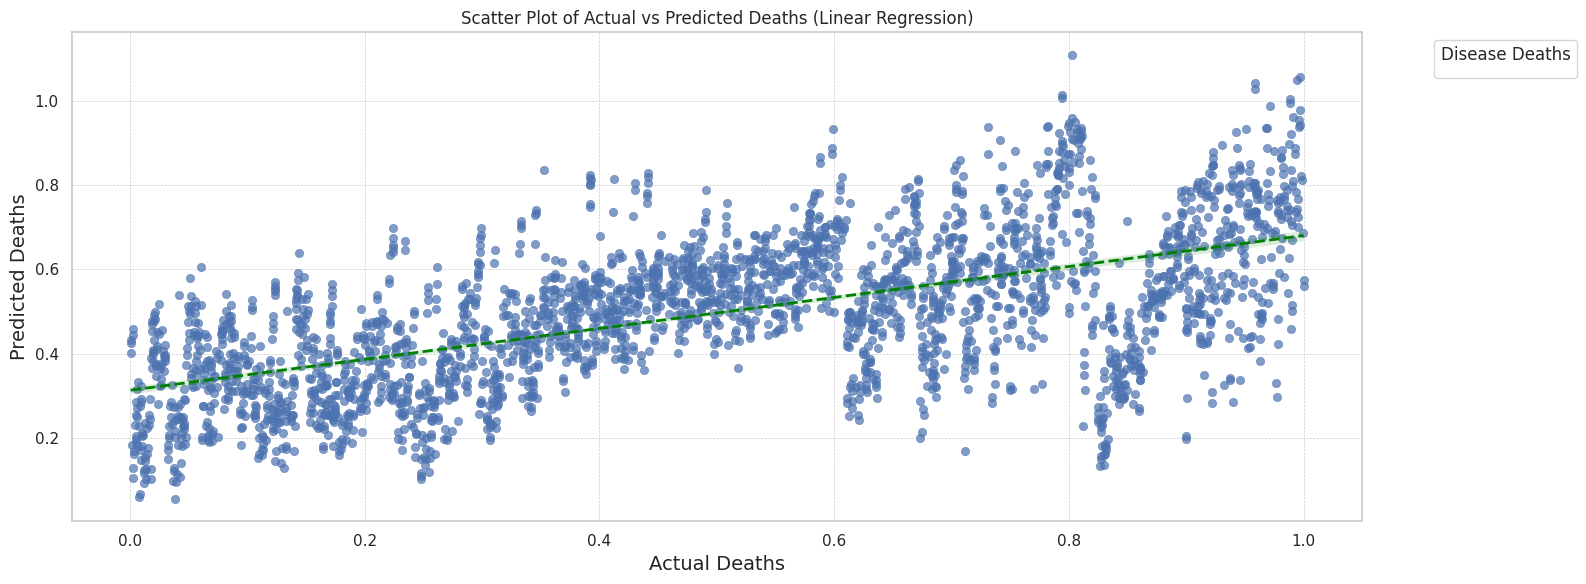

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("6089_source_data_2.csv")

# One-hot encode categorical variables (Type of disease, srcStateName, GENDER)
data_encoded = pd.get_dummies(data, columns=['Type of disease', 'srcStateName', 'GENDER'])

# Separate features (X) and target variables (y_cases, y_deaths)
X = data_encoded.drop(['Cases', 'Deaths'], axis=1)
y_cases = data_encoded['Cases']
y_deaths = data_encoded['Deaths']

# Split the data into training and testing sets for both cases and deaths separately
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, y_cases, y_deaths, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model for cases
linear_cases_regressor = LinearRegression()
linear_cases_regressor.fit(X_train, y_cases_train)

# Make predictions on the testing set for cases using Linear Regression
y_cases_pred_linear = linear_cases_regressor.predict(X_test)

# Calculate overall metrics for cases using Linear Regression
overall_mse_cases_linear = mean_squared_error(y_cases_test, y_cases_pred_linear)
overall_mae_cases_linear = mean_absolute_error(y_cases_test, y_cases_pred_linear)
overall_r2_cases_linear = r2_score(y_cases_test, y_cases_pred_linear)
overall_rmse_cases_linear = np.sqrt(overall_mse_cases_linear)

# Print overall metrics for cases using Linear Regression
print("Overall Metrics for Cases using Linear Regression:")
print("Overall MSE Cases:", overall_mse_cases_linear)
print("Overall MAE Cases:", overall_mae_cases_linear)
print("Overall R^2 Cases:", overall_r2_cases_linear)
print("Overall RMSE Cases:", overall_rmse_cases_linear)

# Initialize and train the Linear Regression model for deaths
linear_deaths_regressor = LinearRegression()
linear_deaths_regressor.fit(X_train, y_deaths_train)

# Make predictions on the testing set for deaths using Linear Regression
y_deaths_pred_linear = linear_deaths_regressor.predict(X_test)

# Calculate overall metrics for deaths using Linear Regression
overall_mse_deaths_linear = mean_squared_error(y_deaths_test, y_deaths_pred_linear)
overall_mae_deaths_linear = mean_absolute_error(y_deaths_test, y_deaths_pred_linear)
overall_r2_deaths_linear = r2_score(y_deaths_test, y_deaths_pred_linear)
overall_rmse_deaths_linear = np.sqrt(overall_mse_deaths_linear)

# Print overall metrics for deaths using Linear Regression
print("\nOverall Metrics for Deaths using Linear Regression:")
print("Overall MSE Deaths:", overall_mse_deaths_linear)
print("Overall MAE Deaths:", overall_mae_deaths_linear)
print("Overall R^2 Deaths:", overall_r2_deaths_linear)
print("Overall RMSE Deaths:", overall_rmse_deaths_linear)

# Convert y_cases_test and y_deaths_test to DataFrame for merging
y_cases_test_df = pd.DataFrame(y_cases_test)
y_deaths_test_df = pd.DataFrame(y_deaths_test)

# Merge the test predictions and actual values for plotting
cases_results = pd.concat([y_cases_test_df.reset_index(drop=True), pd.DataFrame(y_cases_pred_linear, columns=['Predicted_Cases'])], axis=1)
deaths_results = pd.concat([y_deaths_test_df.reset_index(drop=True), pd.DataFrame(y_deaths_pred_linear, columns=['Predicted_Deaths'])], axis=1)

# Set the style and palette
sns.set(style="whitegrid")

# Scatter plot with regression line for Cases
plt.figure(figsize=(16, 6))
sns.scatterplot(data=cases_results, x='Cases', y='Predicted_Cases', alpha=0.7, edgecolor=None)
sns.regplot(data=cases_results, x='Cases', y='Predicted_Cases', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Cases (Linear Regression)')
plt.xlabel('Actual Cases', fontsize=14)
plt.ylabel('Predicted Cases', fontsize=14)
plt.legend(title='Disease Cases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot with regression line for Deaths
plt.figure(figsize=(16, 6))
sns.scatterplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', alpha=0.7, edgecolor=None)
sns.regplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', scatter=False, color='green', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Deaths (Linear Regression)')
plt.xlabel('Actual Deaths', fontsize=14)
plt.ylabel('Predicted Deaths', fontsize=14)
plt.legend(title='Disease Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**KNN Regression**

Overall Metrics for Cases using KNN Regression:
Overall MSE Cases: 0.026719964451377375
Overall MAE Cases: 0.09077724714433821
Overall R^2 Cases: 0.6841551045107972
Overall RMSE Cases: 0.1634624251972831

Overall Metrics for Deaths using KNN Regression:
Overall MSE Deaths: 0.028051561908144014
Overall MAE Deaths: 0.09612916776744254
Overall R^2 Deaths: 0.6631349112565197
Overall RMSE Deaths: 0.1674860051113048


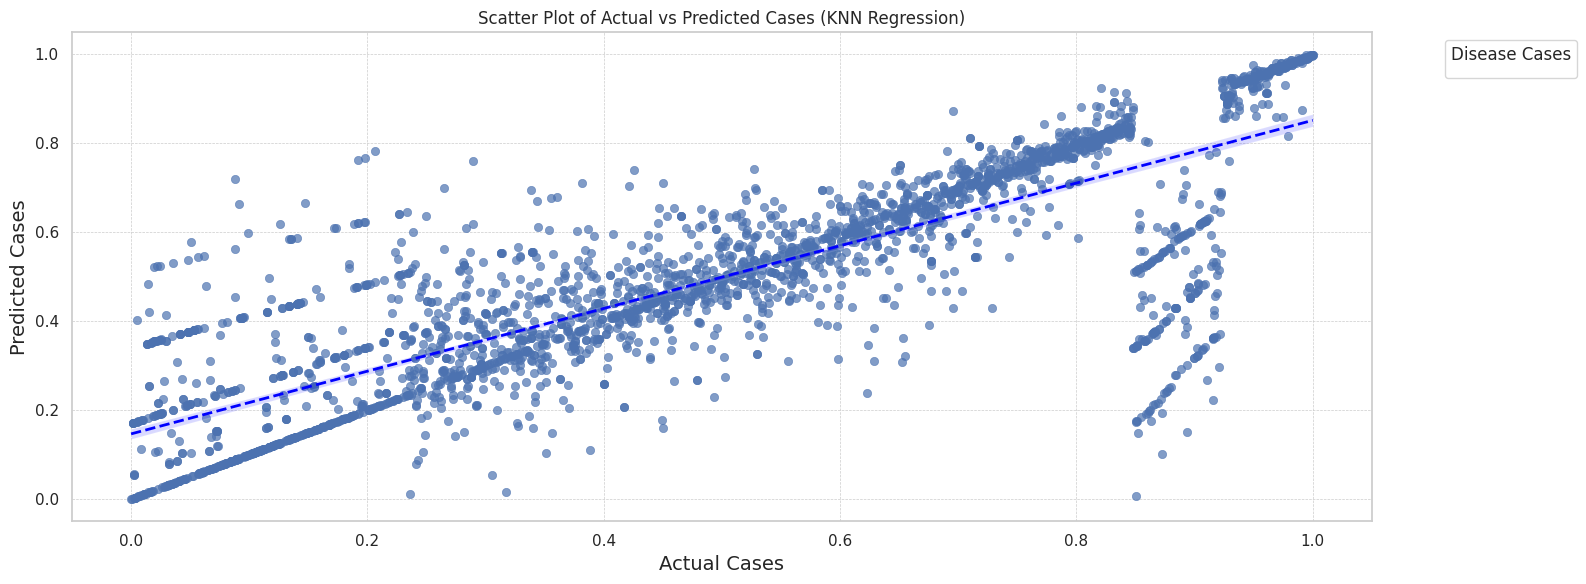

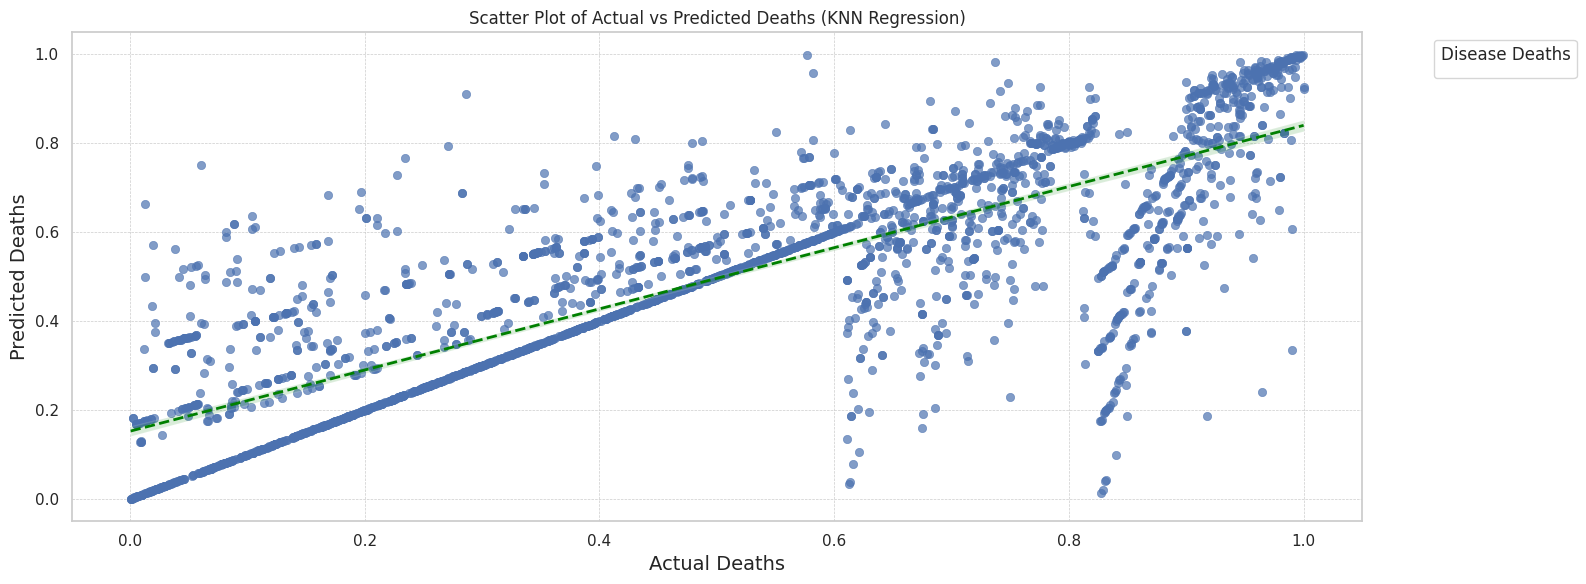

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("6089_source_data_2.csv")

# One-hot encode categorical variables (Type of disease, srcStateName, GENDER)
data_encoded = pd.get_dummies(data, columns=['Type of disease', 'srcStateName', 'GENDER'])

# Separate features (X) and target variables (y_cases, y_deaths)
X = data_encoded.drop(['Cases', 'Deaths'], axis=1)
y_cases = data_encoded['Cases']
y_deaths = data_encoded['Deaths']

# Split the data into training and testing sets for both cases and deaths separately
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, y_cases, y_deaths, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN Regression model for cases
knn_cases_regressor = KNeighborsRegressor(n_neighbors=5)
knn_cases_regressor.fit(X_train_scaled, y_cases_train)

# Make predictions on the testing set for cases using KNN Regression
y_cases_pred_knn = knn_cases_regressor.predict(X_test_scaled)

# Calculate overall metrics for cases using KNN Regression
overall_mse_cases_knn = mean_squared_error(y_cases_test, y_cases_pred_knn)
overall_mae_cases_knn = mean_absolute_error(y_cases_test, y_cases_pred_knn)
overall_r2_cases_knn = r2_score(y_cases_test, y_cases_pred_knn)
overall_rmse_cases_knn = np.sqrt(overall_mse_cases_knn)

# Print overall metrics for cases using KNN Regression
print("Overall Metrics for Cases using KNN Regression:")
print("Overall MSE Cases:", overall_mse_cases_knn)
print("Overall MAE Cases:", overall_mae_cases_knn)
print("Overall R^2 Cases:", overall_r2_cases_knn)
print("Overall RMSE Cases:", overall_rmse_cases_knn)

# Initialize and train the KNN Regression model for deaths
knn_deaths_regressor = KNeighborsRegressor(n_neighbors=5)
knn_deaths_regressor.fit(X_train_scaled, y_deaths_train)

# Make predictions on the testing set for deaths using KNN Regression
y_deaths_pred_knn = knn_deaths_regressor.predict(X_test_scaled)

# Calculate overall metrics for deaths using KNN Regression
overall_mse_deaths_knn = mean_squared_error(y_deaths_test, y_deaths_pred_knn)
overall_mae_deaths_knn = mean_absolute_error(y_deaths_test, y_deaths_pred_knn)
overall_r2_deaths_knn = r2_score(y_deaths_test, y_deaths_pred_knn)
overall_rmse_deaths_knn = np.sqrt(overall_mse_deaths_knn)

# Print overall metrics for deaths using KNN Regression
print("\nOverall Metrics for Deaths using KNN Regression:")
print("Overall MSE Deaths:", overall_mse_deaths_knn)
print("Overall MAE Deaths:", overall_mae_deaths_knn)
print("Overall R^2 Deaths:", overall_r2_deaths_knn)
print("Overall RMSE Deaths:", overall_rmse_deaths_knn)

# Convert y_cases_test and y_deaths_test to DataFrame for merging
y_cases_test_df = pd.DataFrame(y_cases_test)
y_deaths_test_df = pd.DataFrame(y_deaths_test)

# Merge the test predictions and actual values for plotting
cases_results = pd.concat([y_cases_test_df.reset_index(drop=True), pd.DataFrame(y_cases_pred_knn, columns=['Predicted_Cases'])], axis=1)
deaths_results = pd.concat([y_deaths_test_df.reset_index(drop=True), pd.DataFrame(y_deaths_pred_knn, columns=['Predicted_Deaths'])], axis=1)

# Set the style and palette
sns.set(style="whitegrid")

# Scatter plot with regression line for Cases
plt.figure(figsize=(16, 6))
sns.scatterplot(data=cases_results, x='Cases', y='Predicted_Cases', alpha=0.7, edgecolor=None)
sns.regplot(data=cases_results, x='Cases', y='Predicted_Cases', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Cases (KNN Regression)')
plt.xlabel('Actual Cases', fontsize=14)
plt.ylabel('Predicted Cases', fontsize=14)
plt.legend(title='Disease Cases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot with regression line for Deaths
plt.figure(figsize=(16, 6))
sns.scatterplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', alpha=0.7, edgecolor=None)
sns.regplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', scatter=False, color='green', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Deaths (KNN Regression)')
plt.xlabel('Actual Deaths', fontsize=14)
plt.ylabel('Predicted Deaths', fontsize=14)
plt.legend(title='Disease Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Polynomial Regression**

Overall Metrics for Cases using Polynomial Regression:
Overall MSE Cases: 0.022921931569083343
Overall MAE Cases: 0.1101739693584379
Overall R^2 Cases: 0.7290499733252981
Overall RMSE Cases: 0.15139990610658693

Overall Metrics for Deaths using Polynomial Regression:
Overall MSE Deaths: 0.028435869160978178
Overall MAE Deaths: 0.1198422070102224
Overall R^2 Deaths: 0.6585198492769171
Overall RMSE Deaths: 0.16862938403783065


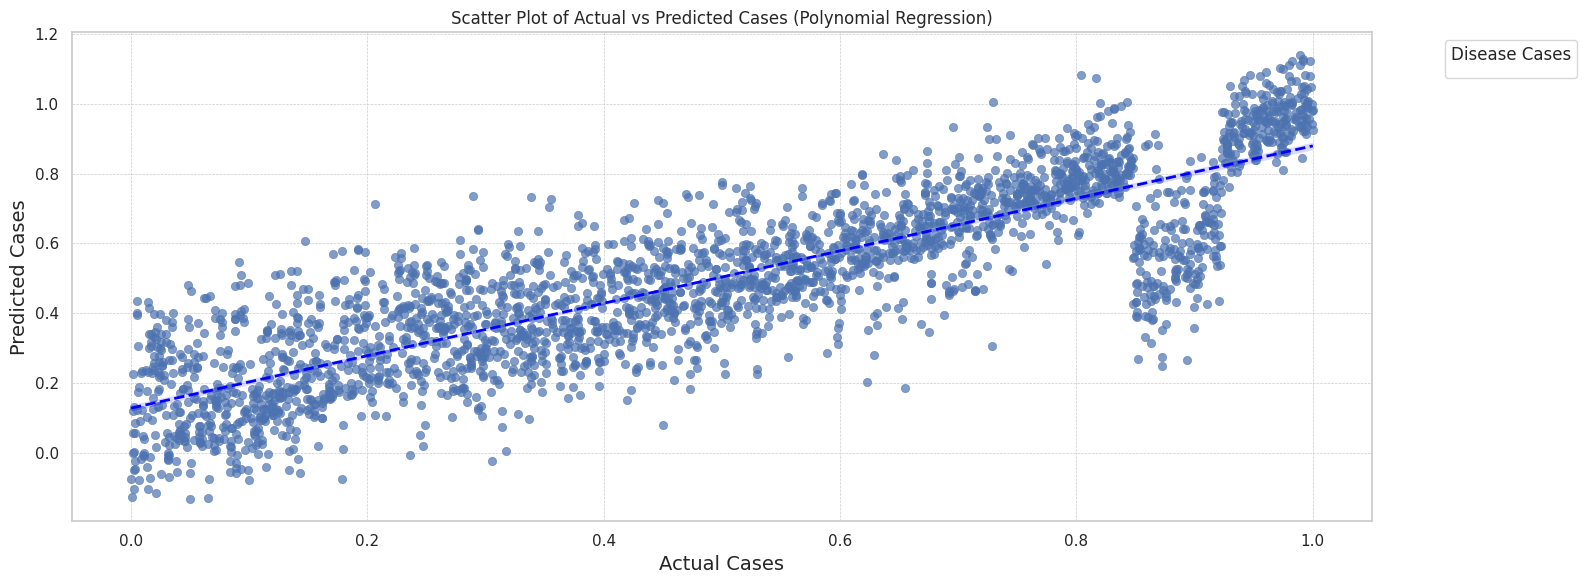

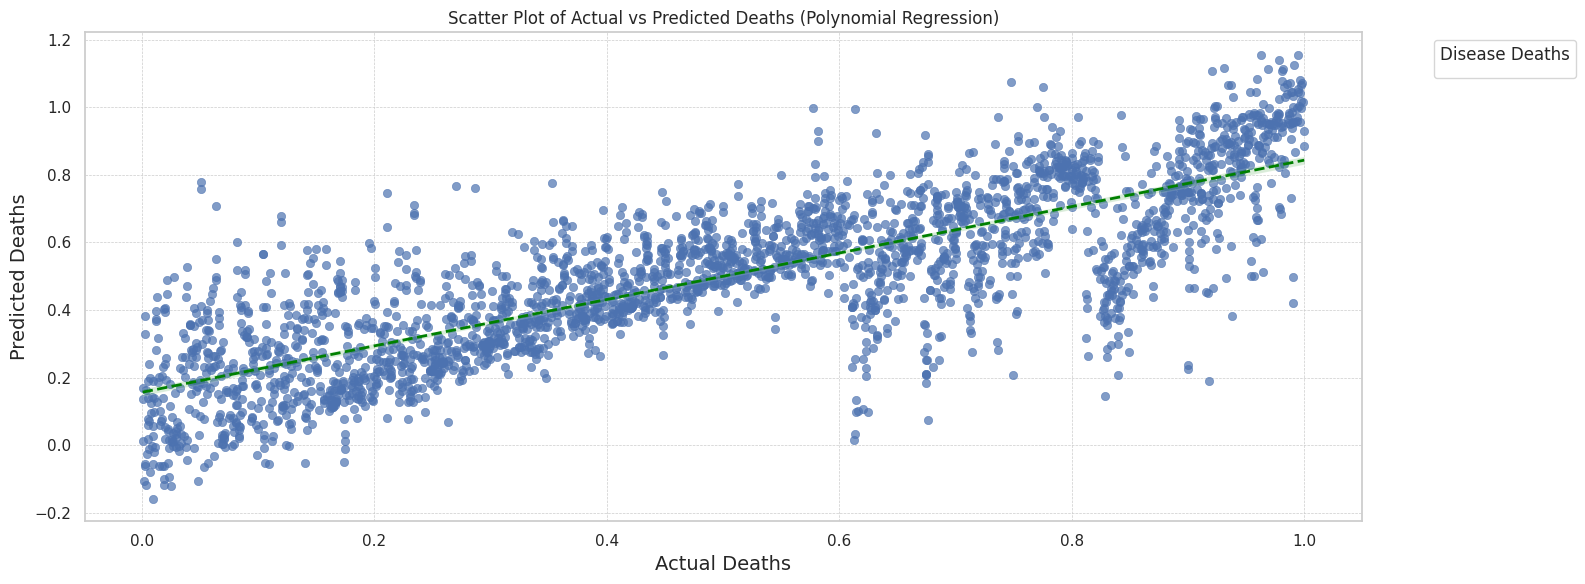

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("6089_source_data_2.csv")

# One-hot encode categorical variables (Type of disease, srcStateName, GENDER)
data_encoded = pd.get_dummies(data, columns=['Type of disease', 'srcStateName', 'GENDER'])

# Separate features (X) and target variables (y_cases, y_deaths)
X = data_encoded.drop(['Cases', 'Deaths'], axis=1)
y_cases = data_encoded['Cases']
y_deaths = data_encoded['Deaths']

# Split the data into training and testing sets for both cases and deaths separately
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, y_cases, y_deaths, test_size=0.2, random_state=42)

# Transform features using PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the Polynomial Regression model for cases
poly_cases_regressor = LinearRegression()
poly_cases_regressor.fit(X_train_poly, y_cases_train)

# Make predictions on the testing set for cases using Polynomial Regression
y_cases_pred_poly = poly_cases_regressor.predict(X_test_poly)

# Calculate overall metrics for cases using Polynomial Regression
overall_mse_cases_poly = mean_squared_error(y_cases_test, y_cases_pred_poly)
overall_mae_cases_poly = mean_absolute_error(y_cases_test, y_cases_pred_poly)
overall_r2_cases_poly = r2_score(y_cases_test, y_cases_pred_poly)
overall_rmse_cases_poly = np.sqrt(overall_mse_cases_poly)

# Print overall metrics for cases using Polynomial Regression
print("Overall Metrics for Cases using Polynomial Regression:")
print("Overall MSE Cases:", overall_mse_cases_poly)
print("Overall MAE Cases:", overall_mae_cases_poly)
print("Overall R^2 Cases:", overall_r2_cases_poly)
print("Overall RMSE Cases:", overall_rmse_cases_poly)

# Initialize and train the Polynomial Regression model for deaths
poly_deaths_regressor = LinearRegression()
poly_deaths_regressor.fit(X_train_poly, y_deaths_train)

# Make predictions on the testing set for deaths using Polynomial Regression
y_deaths_pred_poly = poly_deaths_regressor.predict(X_test_poly)

# Calculate overall metrics for deaths using Polynomial Regression
overall_mse_deaths_poly = mean_squared_error(y_deaths_test, y_deaths_pred_poly)
overall_mae_deaths_poly = mean_absolute_error(y_deaths_test, y_deaths_pred_poly)
overall_r2_deaths_poly = r2_score(y_deaths_test, y_deaths_pred_poly)
overall_rmse_deaths_poly = np.sqrt(overall_mse_deaths_poly)

# Print overall metrics for deaths using Polynomial Regression
print("\nOverall Metrics for Deaths using Polynomial Regression:")
print("Overall MSE Deaths:", overall_mse_deaths_poly)
print("Overall MAE Deaths:", overall_mae_deaths_poly)
print("Overall R^2 Deaths:", overall_r2_deaths_poly)
print("Overall RMSE Deaths:", overall_rmse_deaths_poly)

# Convert y_cases_test and y_deaths_test to DataFrame for merging
y_cases_test_df = pd.DataFrame(y_cases_test)
y_deaths_test_df = pd.DataFrame(y_deaths_test)

# Merge the test predictions and actual values for plotting
cases_results = pd.concat([y_cases_test_df.reset_index(drop=True), pd.DataFrame(y_cases_pred_poly, columns=['Predicted_Cases'])], axis=1)
deaths_results = pd.concat([y_deaths_test_df.reset_index(drop=True), pd.DataFrame(y_deaths_pred_poly, columns=['Predicted_Deaths'])], axis=1)

# Set the style and palette
sns.set(style="whitegrid")

# Scatter plot with regression line for Cases
plt.figure(figsize=(16, 6))
sns.scatterplot(data=cases_results, x='Cases', y='Predicted_Cases', alpha=0.7, edgecolor=None)
sns.regplot(data=cases_results, x='Cases', y='Predicted_Cases', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Cases (Polynomial Regression)')
plt.xlabel('Actual Cases', fontsize=14)
plt.ylabel('Predicted Cases', fontsize=14)
plt.legend(title='Disease Cases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot with regression line for Deaths
plt.figure(figsize=(16, 6))
sns.scatterplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', alpha=0.7, edgecolor=None)
sns.regplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', scatter=False, color='green', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Deaths (Polynomial Regression)')
plt.xlabel('Actual Deaths', fontsize=14)
plt.ylabel('Predicted Deaths', fontsize=14)
plt.legend(title='Disease Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Poissions Regression**

Overall Metrics for Cases using Poisson Regression:
Overall MSE Cases: 0.059090414892895876
Overall MAE Cases: 0.20945829626178805
Overall R^2 Cases: 0.3015183103921286
Overall RMSE Cases: 0.2430852008923947

Overall Metrics for Deaths using Poisson Regression:
Overall MSE Deaths: 0.06595304076956808
Overall MAE Deaths: 0.22061397255893225
Overall R^2 Deaths: 0.207984318146194
Overall RMSE Deaths: 0.2568132410324049


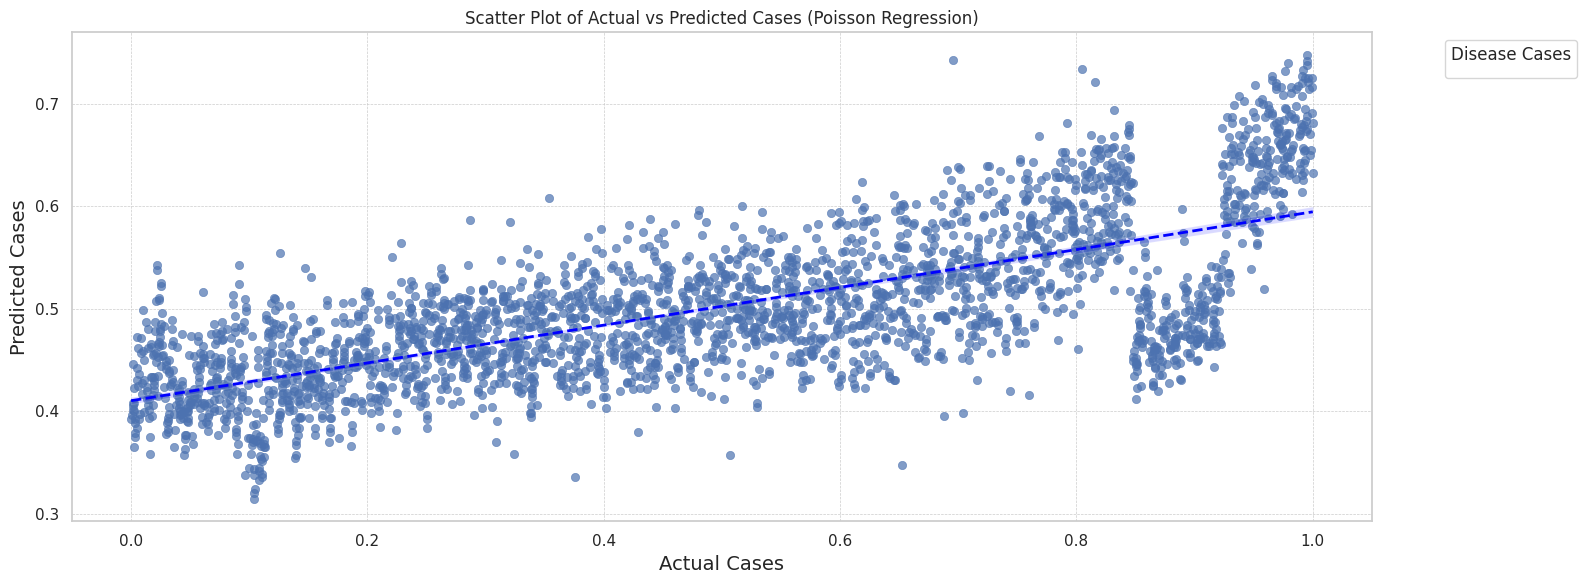

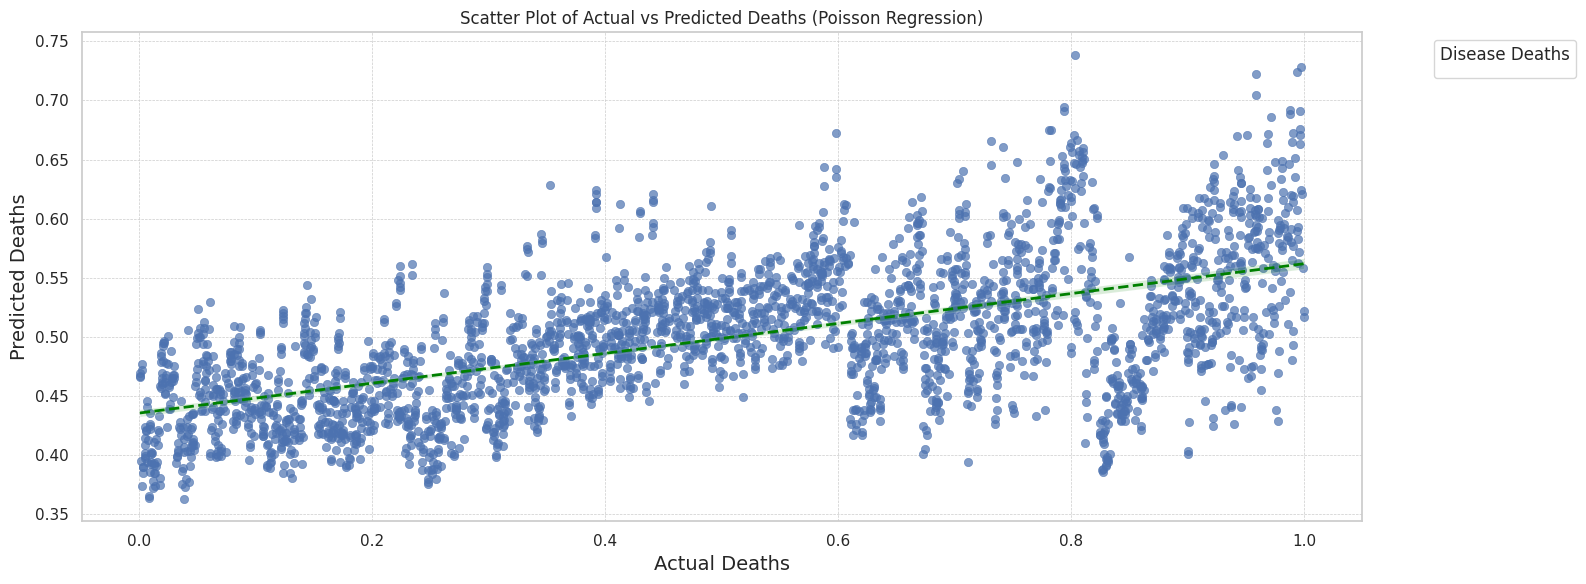

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("6089_source_data_2.csv")

# One-hot encode categorical variables (Type of disease, srcStateName, GENDER)
data_encoded = pd.get_dummies(data, columns=['Type of disease', 'srcStateName', 'GENDER'])

# Separate features (X) and target variables (y_cases, y_deaths)
X = data_encoded.drop(['Cases', 'Deaths'], axis=1)
y_cases = data_encoded['Cases']
y_deaths = data_encoded['Deaths']

# Split the data into training and testing sets for both cases and deaths separately
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, y_cases, y_deaths, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Poisson Regression model for cases
poisson_cases_regressor = PoissonRegressor()
poisson_cases_regressor.fit(X_train_scaled, y_cases_train)

# Make predictions on the testing set for cases using Poisson Regression
y_cases_pred_poisson = poisson_cases_regressor.predict(X_test_scaled)

# Calculate overall metrics for cases using Poisson Regression
overall_mse_cases_poisson = mean_squared_error(y_cases_test, y_cases_pred_poisson)
overall_mae_cases_poisson = mean_absolute_error(y_cases_test, y_cases_pred_poisson)
overall_r2_cases_poisson = r2_score(y_cases_test, y_cases_pred_poisson)
overall_rmse_cases_poisson = np.sqrt(overall_mse_cases_poisson)

# Print overall metrics for cases using Poisson Regression
print("Overall Metrics for Cases using Poisson Regression:")
print("Overall MSE Cases:", overall_mse_cases_poisson)
print("Overall MAE Cases:", overall_mae_cases_poisson)
print("Overall R^2 Cases:", overall_r2_cases_poisson)
print("Overall RMSE Cases:", overall_rmse_cases_poisson)

# Initialize and train the Poisson Regression model for deaths
poisson_deaths_regressor = PoissonRegressor()
poisson_deaths_regressor.fit(X_train_scaled, y_deaths_train)

# Make predictions on the testing set for deaths using Poisson Regression
y_deaths_pred_poisson = poisson_deaths_regressor.predict(X_test_scaled)

# Calculate overall metrics for deaths using Poisson Regression
overall_mse_deaths_poisson = mean_squared_error(y_deaths_test, y_deaths_pred_poisson)
overall_mae_deaths_poisson = mean_absolute_error(y_deaths_test, y_deaths_pred_poisson)
overall_r2_deaths_poisson = r2_score(y_deaths_test, y_deaths_pred_poisson)
overall_rmse_deaths_poisson = np.sqrt(overall_mse_deaths_poisson)

# Print overall metrics for deaths using Poisson Regression
print("\nOverall Metrics for Deaths using Poisson Regression:")
print("Overall MSE Deaths:", overall_mse_deaths_poisson)
print("Overall MAE Deaths:", overall_mae_deaths_poisson)
print("Overall R^2 Deaths:", overall_r2_deaths_poisson)
print("Overall RMSE Deaths:", overall_rmse_deaths_poisson)

# Convert y_cases_test and y_deaths_test to DataFrame for merging
y_cases_test_df = pd.DataFrame(y_cases_test)
y_deaths_test_df = pd.DataFrame(y_deaths_test)

# Merge the test predictions and actual values for plotting
cases_results = pd.concat([y_cases_test_df.reset_index(drop=True), pd.DataFrame(y_cases_pred_poisson, columns=['Predicted_Cases'])], axis=1)
deaths_results = pd.concat([y_deaths_test_df.reset_index(drop=True), pd.DataFrame(y_deaths_pred_poisson, columns=['Predicted_Deaths'])], axis=1)

# Set the style and palette
sns.set(style="whitegrid")

# Scatter plot with regression line for Cases
plt.figure(figsize=(16, 6))
sns.scatterplot(data=cases_results, x='Cases', y='Predicted_Cases', alpha=0.7, edgecolor=None)
sns.regplot(data=cases_results, x='Cases', y='Predicted_Cases', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Cases (Poisson Regression)')
plt.xlabel('Actual Cases', fontsize=14)
plt.ylabel('Predicted Cases', fontsize=14)
plt.legend(title='Disease Cases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot with regression line for Deaths
plt.figure(figsize=(16, 6))
sns.scatterplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', alpha=0.7, edgecolor=None)
sns.regplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', scatter=False, color='green', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Deaths (Poisson Regression)')
plt.xlabel('Actual Deaths', fontsize=14)
plt.ylabel('Predicted Deaths', fontsize=14)
plt.legend(title='Disease Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Random Forest Regression**

Overall Metrics for Cases using Random Forest Regression:
Overall MSE Cases: 0.0058159025458700535
Overall MAE Cases: 0.033366360948632476
Overall R^2 Cases: 0.9312527853426458
Overall RMSE Cases: 0.07626206492005087

Overall Metrics for Deaths using Random Forest Regression:
Overall MSE Deaths: 0.009874510505834233
Overall MAE Deaths: 0.043787444590349486
Overall R^2 Deaths: 0.8814191570245308
Overall RMSE Deaths: 0.0993705716287988


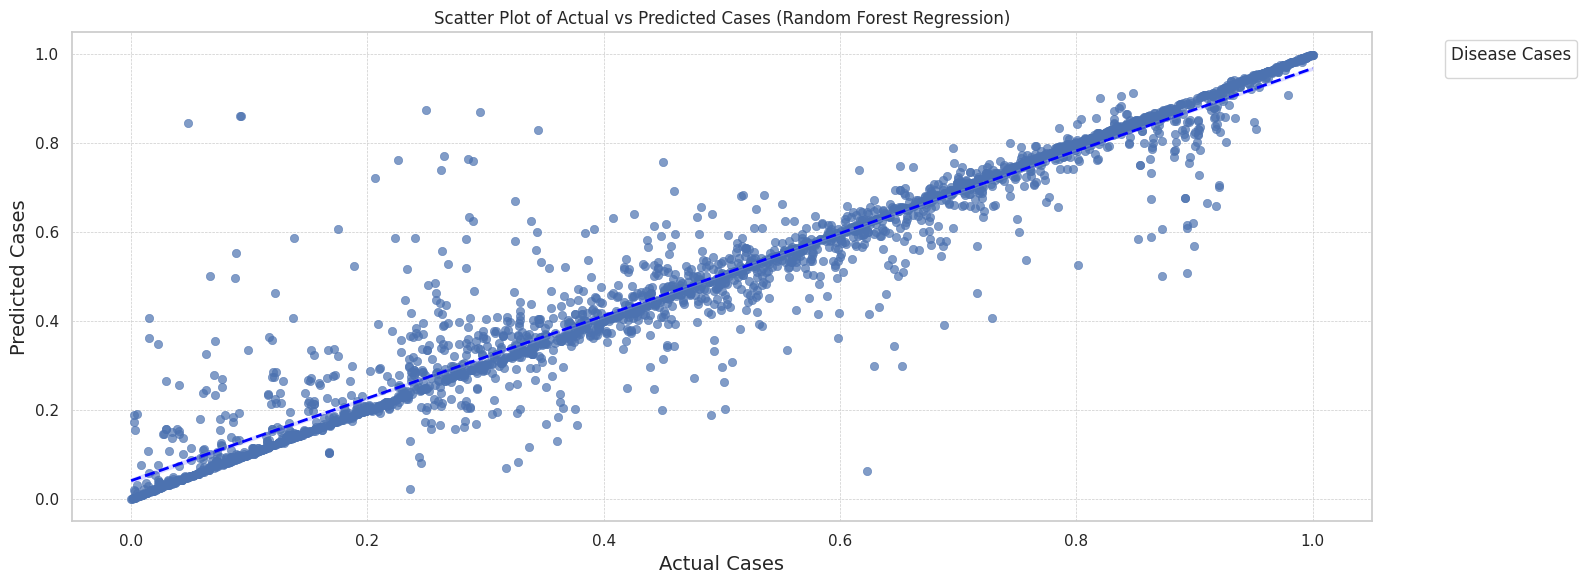

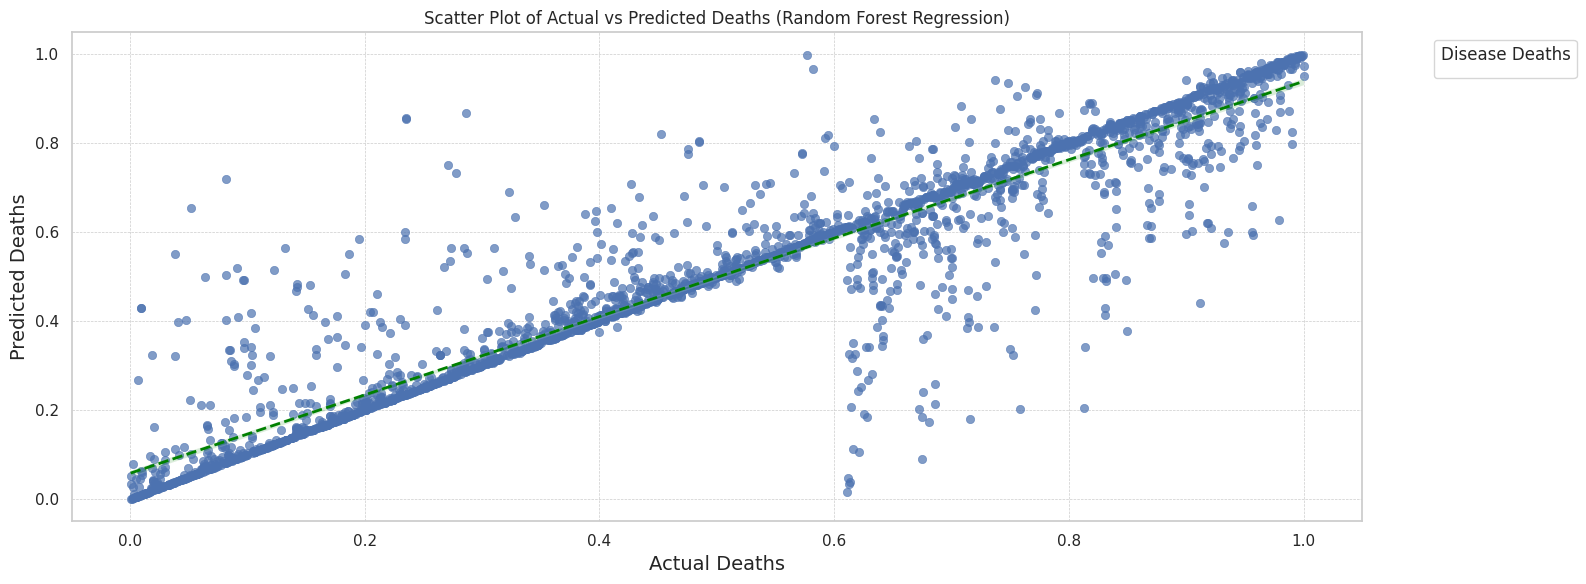

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("6089_source_data_2.csv")

# One-hot encode categorical variables (Type of disease, srcStateName, GENDER)
data_encoded = pd.get_dummies(data, columns=['Type of disease', 'srcStateName', 'GENDER'])

# Separate features (X) and target variables (y_cases, y_deaths)
X = data_encoded.drop(['Cases', 'Deaths'], axis=1)
y_cases = data_encoded['Cases']
y_deaths = data_encoded['Deaths']

# Split the data into training and testing sets for both cases and deaths separately
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, y_cases, y_deaths, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Regression model for cases
random_forest_cases_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_cases_regressor.fit(X_train_scaled, y_cases_train)

# Make predictions on the testing set for cases using Random Forest Regression
y_cases_pred_rf = random_forest_cases_regressor.predict(X_test_scaled)

# Calculate overall metrics for cases using Random Forest Regression
overall_mse_cases_rf = mean_squared_error(y_cases_test, y_cases_pred_rf)
overall_mae_cases_rf = mean_absolute_error(y_cases_test, y_cases_pred_rf)
overall_r2_cases_rf = r2_score(y_cases_test, y_cases_pred_rf)
overall_rmse_cases_rf = np.sqrt(overall_mse_cases_rf)

# Print overall metrics for cases using Random Forest Regression
print("Overall Metrics for Cases using Random Forest Regression:")
print("Overall MSE Cases:", overall_mse_cases_rf)
print("Overall MAE Cases:", overall_mae_cases_rf)
print("Overall R^2 Cases:", overall_r2_cases_rf)
print("Overall RMSE Cases:", overall_rmse_cases_rf)

# Initialize and train the Random Forest Regression model for deaths
random_forest_deaths_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_deaths_regressor.fit(X_train_scaled, y_deaths_train)

# Make predictions on the testing set for deaths using Random Forest Regression
y_deaths_pred_rf = random_forest_deaths_regressor.predict(X_test_scaled)

# Calculate overall metrics for deaths using Random Forest Regression
overall_mse_deaths_rf = mean_squared_error(y_deaths_test, y_deaths_pred_rf)
overall_mae_deaths_rf = mean_absolute_error(y_deaths_test, y_deaths_pred_rf)
overall_r2_deaths_rf = r2_score(y_deaths_test, y_deaths_pred_rf)
overall_rmse_deaths_rf = np.sqrt(overall_mse_deaths_rf)

# Print overall metrics for deaths using Random Forest Regression
print("\nOverall Metrics for Deaths using Random Forest Regression:")
print("Overall MSE Deaths:", overall_mse_deaths_rf)
print("Overall MAE Deaths:", overall_mae_deaths_rf)
print("Overall R^2 Deaths:", overall_r2_deaths_rf)
print("Overall RMSE Deaths:", overall_rmse_deaths_rf)

# Convert y_cases_test and y_deaths_test to DataFrame for merging
y_cases_test_df = pd.DataFrame(y_cases_test)
y_deaths_test_df = pd.DataFrame(y_deaths_test)

# Merge the test predictions and actual values for plotting
cases_results = pd.concat([y_cases_test_df.reset_index(drop=True), pd.DataFrame(y_cases_pred_rf, columns=['Predicted_Cases'])], axis=1)
deaths_results = pd.concat([y_deaths_test_df.reset_index(drop=True), pd.DataFrame(y_deaths_pred_rf, columns=['Predicted_Deaths'])], axis=1)

# Set the style and palette
sns.set(style="whitegrid")

# Scatter plot with regression line for Cases
plt.figure(figsize=(16, 6))
sns.scatterplot(data=cases_results, x='Cases', y='Predicted_Cases', alpha=0.7, edgecolor=None)
sns.regplot(data=cases_results, x='Cases', y='Predicted_Cases', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Cases (Random Forest Regression)')
plt.xlabel('Actual Cases', fontsize=14)
plt.ylabel('Predicted Cases', fontsize=14)
plt.legend(title='Disease Cases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot with regression line for Deaths
plt.figure(figsize=(16, 6))
sns.scatterplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', alpha=0.7, edgecolor=None)
sns.regplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', scatter=False, color='green', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Deaths (Random Forest Regression)')
plt.xlabel('Actual Deaths', fontsize=14)
plt.ylabel('Predicted Deaths', fontsize=14)
plt.legend(title='Disease Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Gradient Boost Regression**

Overall Metrics for Cases using Gradient Boosting Regression:
Overall MSE Cases: 0.03551097634513049
Overall MAE Cases: 0.1549058957630466
Overall R^2 Cases: 0.5802404365897602
Overall RMSE Cases: 0.18844356275853652

Overall Metrics for Deaths using Gradient Boosting Regression:
Overall MSE Deaths: 0.04977611001680907
Overall MAE Deaths: 0.1830902978138608
Overall R^2 Deaths: 0.40224955127188333
Overall RMSE Deaths: 0.2231056028359868


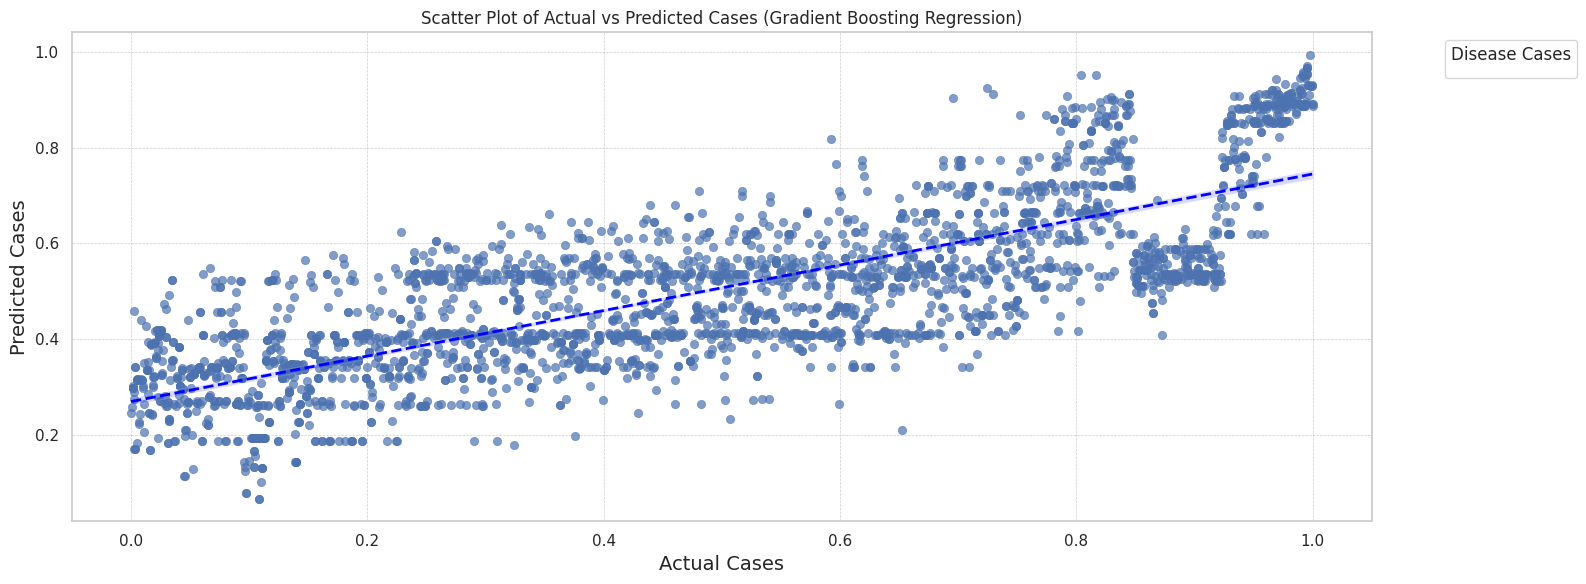

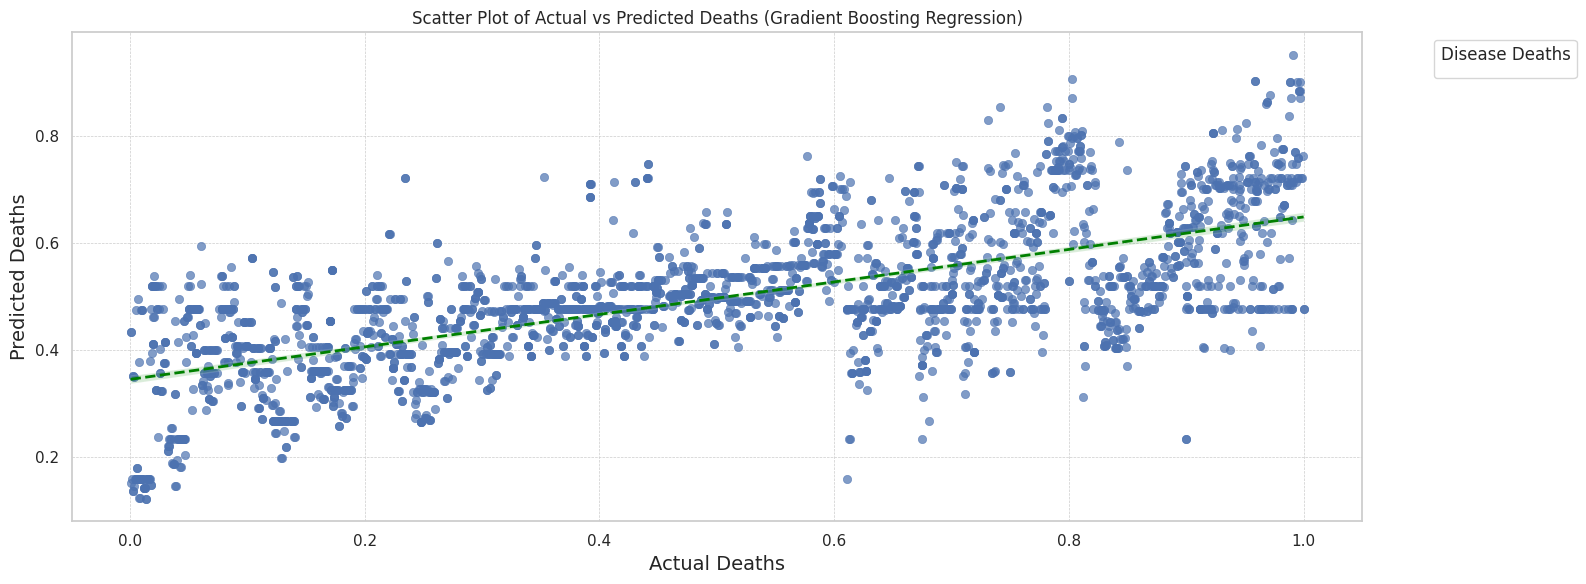

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("6089_source_data_2.csv")

# One-hot encode categorical variables (Type of disease, srcStateName, GENDER)
data_encoded = pd.get_dummies(data, columns=['Type of disease', 'srcStateName', 'GENDER'])

# Separate features (X) and target variables (y_cases, y_deaths)
X = data_encoded.drop(['Cases', 'Deaths'], axis=1)
y_cases = data_encoded['Cases']
y_deaths = data_encoded['Deaths']

# Split the data into training and testing sets for both cases and deaths separately
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, y_cases, y_deaths, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Regression model for cases
gradient_boosting_cases_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_cases_regressor.fit(X_train_scaled, y_cases_train)

# Make predictions on the testing set for cases using Gradient Boosting Regression
y_cases_pred_gb = gradient_boosting_cases_regressor.predict(X_test_scaled)

# Calculate overall metrics for cases using Gradient Boosting Regression
overall_mse_cases_gb = mean_squared_error(y_cases_test, y_cases_pred_gb)
overall_mae_cases_gb = mean_absolute_error(y_cases_test, y_cases_pred_gb)
overall_r2_cases_gb = r2_score(y_cases_test, y_cases_pred_gb)
overall_rmse_cases_gb = np.sqrt(overall_mse_cases_gb)

# Print overall metrics for cases using Gradient Boosting Regression
print("Overall Metrics for Cases using Gradient Boosting Regression:")
print("Overall MSE Cases:", overall_mse_cases_gb)
print("Overall MAE Cases:", overall_mae_cases_gb)
print("Overall R^2 Cases:", overall_r2_cases_gb)
print("Overall RMSE Cases:", overall_rmse_cases_gb)

# Initialize and train the Gradient Boosting Regression model for deaths
gradient_boosting_deaths_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_deaths_regressor.fit(X_train_scaled, y_deaths_train)

# Make predictions on the testing set for deaths using Gradient Boosting Regression
y_deaths_pred_gb = gradient_boosting_deaths_regressor.predict(X_test_scaled)

# Calculate overall metrics for deaths using Gradient Boosting Regression
overall_mse_deaths_gb = mean_squared_error(y_deaths_test, y_deaths_pred_gb)
overall_mae_deaths_gb = mean_absolute_error(y_deaths_test, y_deaths_pred_gb)
overall_r2_deaths_gb = r2_score(y_deaths_test, y_deaths_pred_gb)
overall_rmse_deaths_gb = np.sqrt(overall_mse_deaths_gb)

# Print overall metrics for deaths using Gradient Boosting Regression
print("\nOverall Metrics for Deaths using Gradient Boosting Regression:")
print("Overall MSE Deaths:", overall_mse_deaths_gb)
print("Overall MAE Deaths:", overall_mae_deaths_gb)
print("Overall R^2 Deaths:", overall_r2_deaths_gb)
print("Overall RMSE Deaths:", overall_rmse_deaths_gb)

# Convert y_cases_test and y_deaths_test to DataFrame for merging
y_cases_test_df = pd.DataFrame(y_cases_test)
y_deaths_test_df = pd.DataFrame(y_deaths_test)

# Merge the test predictions and actual values for plotting
cases_results = pd.concat([y_cases_test_df.reset_index(drop=True), pd.DataFrame(y_cases_pred_gb, columns=['Predicted_Cases'])], axis=1)
deaths_results = pd.concat([y_deaths_test_df.reset_index(drop=True), pd.DataFrame(y_deaths_pred_gb, columns=['Predicted_Deaths'])], axis=1)

# Set the style and palette
sns.set(style="whitegrid")

# Scatter plot with regression line for Cases
plt.figure(figsize=(16, 6))
sns.scatterplot(data=cases_results, x='Cases', y='Predicted_Cases', alpha=0.7, edgecolor=None)
sns.regplot(data=cases_results, x='Cases', y='Predicted_Cases', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Cases (Gradient Boosting Regression)')
plt.xlabel('Actual Cases', fontsize=14)
plt.ylabel('Predicted Cases', fontsize=14)
plt.legend(title='Disease Cases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot with regression line for Deaths
plt.figure(figsize=(16, 6))
sns.scatterplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', alpha=0.7, edgecolor=None)
sns.regplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', scatter=False, color='green', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Deaths (Gradient Boosting Regression)')
plt.xlabel('Actual Deaths', fontsize=14)
plt.ylabel('Predicted Deaths', fontsize=14)
plt.legend(title='Disease Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Neural Network Regression**

Epoch 1/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1032
Epoch 2/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0349
Epoch 3/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0260
Epoch 4/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0206
Epoch 5/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0178
Epoch 6/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0167
Epoch 7/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0149
Epoch 8/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0137
Epoch 9/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0126
Epoch 10/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0115
Epoch 11/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0114
Epoch 12/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0109
Epoch 13/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0106
Epoch 14/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0096
Epoch 15/50
1126/1126 ━━━━━━━

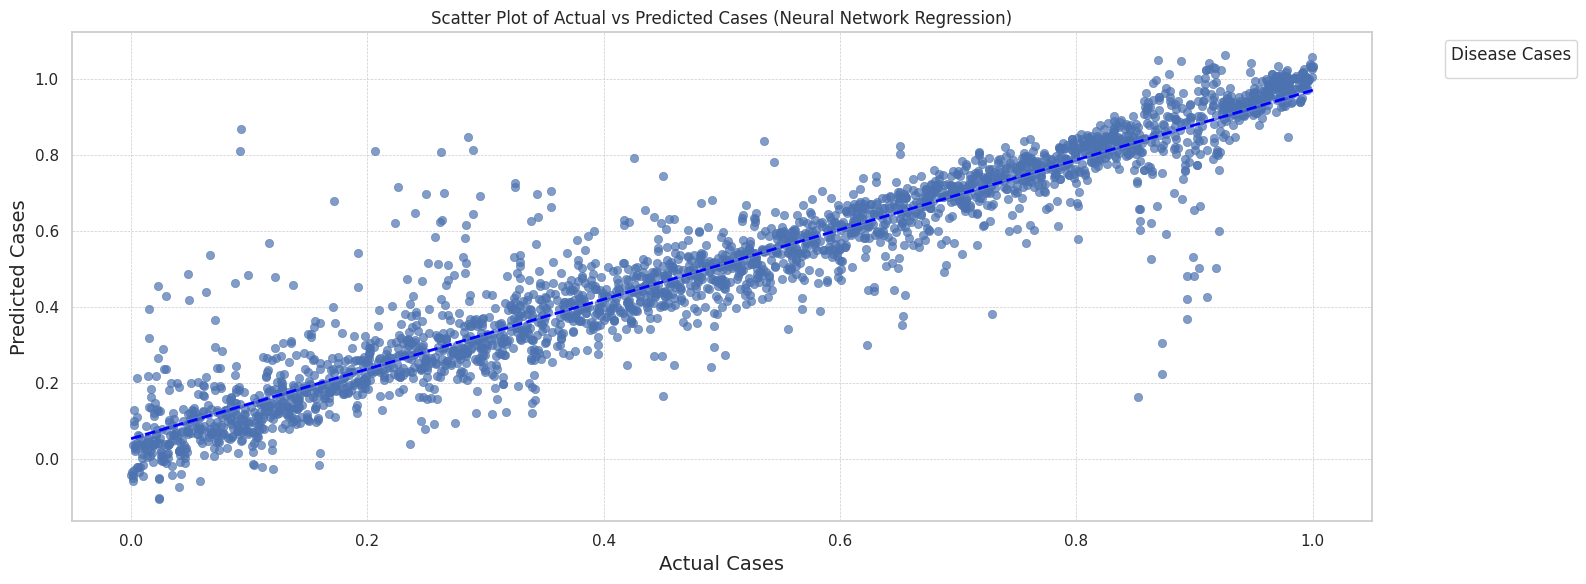

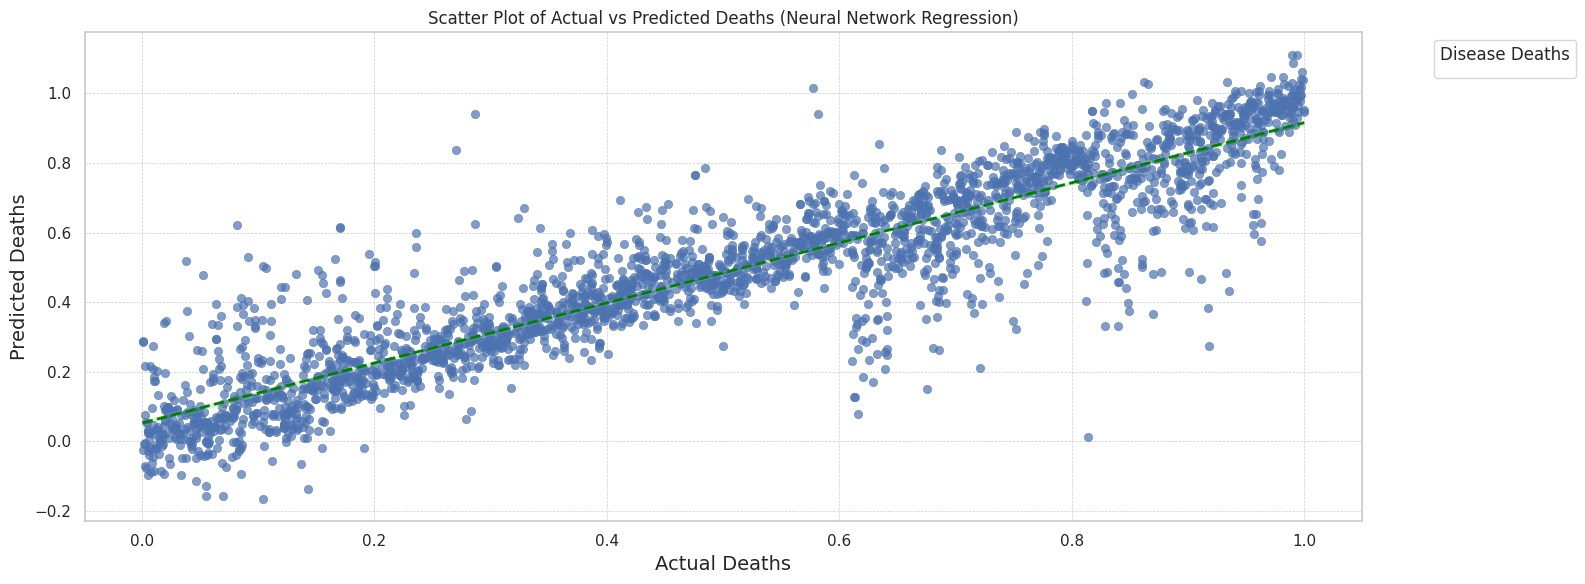

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("6089_source_data_2.csv")

# One-hot encode categorical variables (Type of disease, srcStateName, GENDER)
data_encoded = pd.get_dummies(data, columns=['Type of disease', 'srcStateName', 'GENDER'])

# Separate features (X) and target variables (y_cases, y_deaths)
X = data_encoded.drop(['Cases', 'Deaths'], axis=1)
y_cases = data_encoded['Cases']
y_deaths = data_encoded['Deaths']

# Split the data into training and testing sets for both cases and deaths separately
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, y_cases, y_deaths, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model for cases
nn_cases_model = Sequential()
nn_cases_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_cases_model.add(Dense(32, activation='relu'))
nn_cases_model.add(Dense(1, activation='linear'))

# Compile the model
nn_cases_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_cases_model.fit(X_train_scaled, y_cases_train, epochs=50, batch_size=10, verbose=1)

# Make predictions on the testing set for cases using Neural Network
y_cases_pred_nn = nn_cases_model.predict(X_test_scaled).flatten()

# Calculate overall metrics for cases using Neural Network
overall_mse_cases_nn = mean_squared_error(y_cases_test, y_cases_pred_nn)
overall_mae_cases_nn = mean_absolute_error(y_cases_test, y_cases_pred_nn)
overall_r2_cases_nn = r2_score(y_cases_test, y_cases_pred_nn)
overall_rmse_cases_nn = np.sqrt(overall_mse_cases_nn)

# Print overall metrics for cases using Neural Network
print("Overall Metrics for Cases using Neural Network Regression:")
print("Overall MSE Cases:", overall_mse_cases_nn)
print("Overall MAE Cases:", overall_mae_cases_nn)
print("Overall R^2 Cases:", overall_r2_cases_nn)
print("Overall RMSE Cases:", overall_rmse_cases_nn)

# Define the Neural Network model for deaths
nn_deaths_model = Sequential()
nn_deaths_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_deaths_model.add(Dense(32, activation='relu'))
nn_deaths_model.add(Dense(1, activation='linear'))

# Compile the model
nn_deaths_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_deaths_model.fit(X_train_scaled, y_deaths_train, epochs=50, batch_size=10, verbose=1)

# Make predictions on the testing set for deaths using Neural Network
y_deaths_pred_nn = nn_deaths_model.predict(X_test_scaled).flatten()

# Calculate overall metrics for deaths using Neural Network
overall_mse_deaths_nn = mean_squared_error(y_deaths_test, y_deaths_pred_nn)
overall_mae_deaths_nn = mean_absolute_error(y_deaths_test, y_deaths_pred_nn)
overall_r2_deaths_nn = r2_score(y_deaths_test, y_deaths_pred_nn)
overall_rmse_deaths_nn = np.sqrt(overall_mse_deaths_nn)

# Print overall metrics for deaths using Neural Network
print("\nOverall Metrics for Deaths using Neural Network Regression:")
print("Overall MSE Deaths:", overall_mse_deaths_nn)
print("Overall MAE Deaths:", overall_mae_deaths_nn)
print("Overall R^2 Deaths:", overall_r2_deaths_nn)
print("Overall RMSE Deaths:", overall_rmse_deaths_nn)

# Convert y_cases_test and y_deaths_test to DataFrame for merging
y_cases_test_df = pd.DataFrame(y_cases_test)
y_deaths_test_df = pd.DataFrame(y_deaths_test)

# Merge the test predictions and actual values for plotting
cases_results = pd.concat([y_cases_test_df.reset_index(drop=True), pd.DataFrame(y_cases_pred_nn, columns=['Predicted_Cases'])], axis=1)
deaths_results = pd.concat([y_deaths_test_df.reset_index(drop=True), pd.DataFrame(y_deaths_pred_nn, columns=['Predicted_Deaths'])], axis=1)

# Set the style and palette
sns.set(style="whitegrid")

# Scatter plot with regression line for Cases
plt.figure(figsize=(16, 6))
sns.scatterplot(data=cases_results, x='Cases', y='Predicted_Cases', alpha=0.7, edgecolor=None)
sns.regplot(data=cases_results, x='Cases', y='Predicted_Cases', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Cases (Neural Network Regression)')
plt.xlabel('Actual Cases', fontsize=14)
plt.ylabel('Predicted Cases', fontsize=14)
plt.legend(title='Disease Cases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot with regression line for Deaths
plt.figure(figsize=(16, 6))
sns.scatterplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', alpha=0.7, edgecolor=None)
sns.regplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', scatter=False, color='green', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Deaths (Neural Network Regression)')
plt.xlabel('Actual Deaths', fontsize=14)
plt.ylabel('Predicted Deaths', fontsize=14)
plt.legend(title='Disease Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**LSTM Regression**

Epoch 1/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0817
Epoch 2/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0362
Epoch 3/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0293
Epoch 4/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0251
Epoch 5/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0226
Epoch 6/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0210
Epoch 7/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0195
Epoch 8/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0187
Epoch 9/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0178
Epoch 10/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0157
Epoch 11/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0167
Epoch 12/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0147
Epoch 13/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0136
Epoch 14/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0138
Epoch 15/50
1126/1126 ━━━━━━━

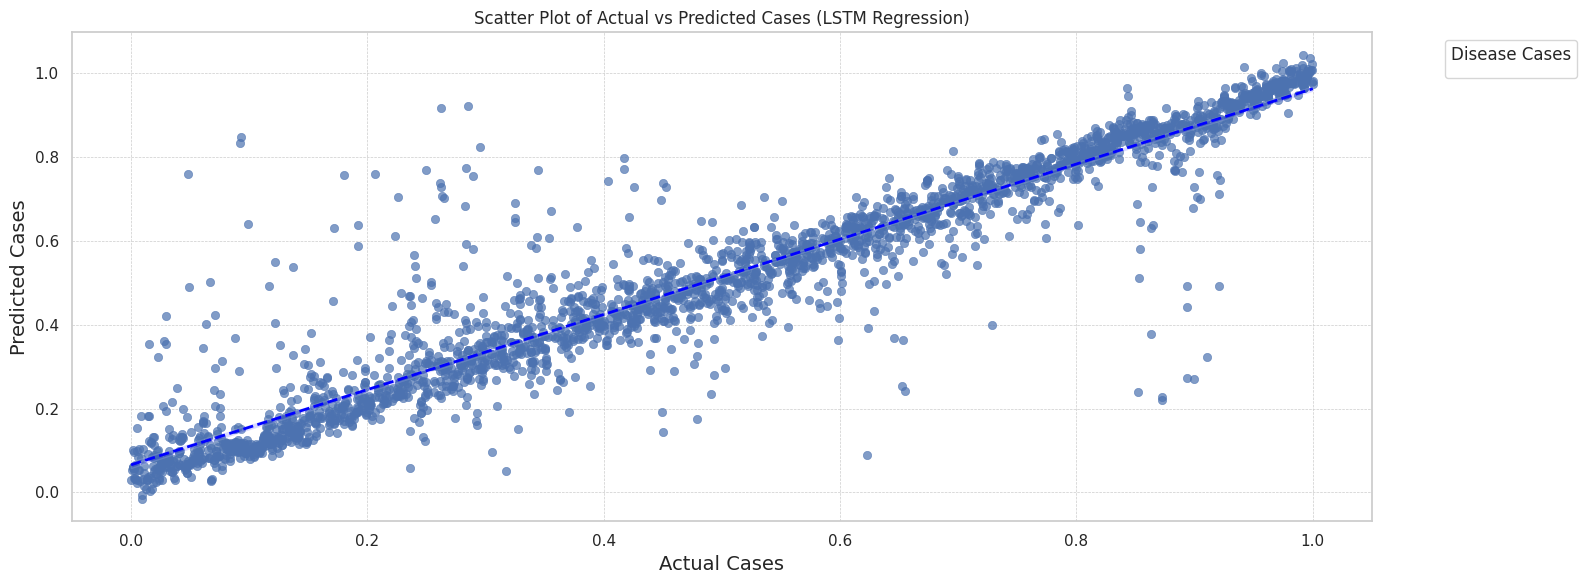

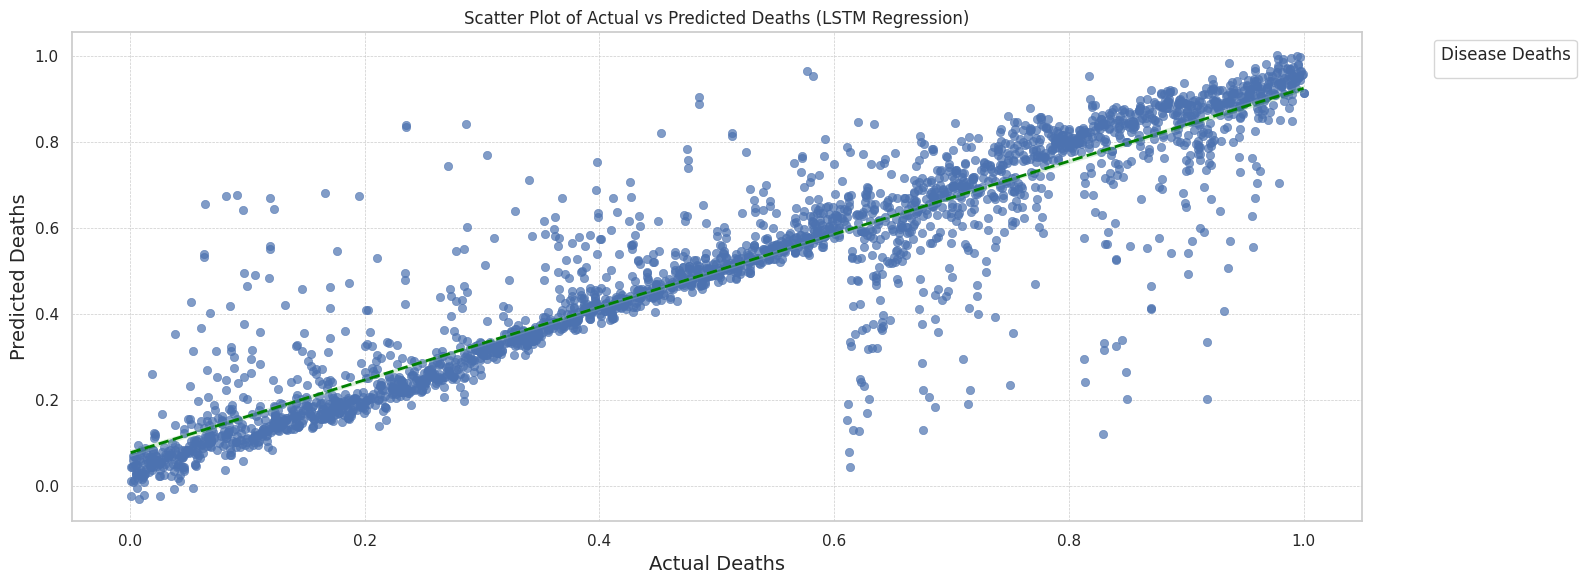

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the data
data = pd.read_csv("6089_source_data_2.csv")

# One-hot encode categorical variables (Type of disease, srcStateName, GENDER)
data_encoded = pd.get_dummies(data, columns=['Type of disease', 'srcStateName', 'GENDER'])

# Separate features (X) and target variables (y_cases, y_deaths)
X = data_encoded.drop(['Cases', 'Deaths'], axis=1)
y_cases = data_encoded['Cases']
y_deaths = data_encoded['Deaths']

# Split the data into training and testing sets for both cases and deaths separately
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, y_cases, y_deaths, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to fit LSTM input (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model for cases
lstm_cases_model = Sequential()
lstm_cases_model.add(LSTM(64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), activation='relu', return_sequences=True))
lstm_cases_model.add(Dropout(0.2))
lstm_cases_model.add(LSTM(32, activation='relu'))
lstm_cases_model.add(Dropout(0.2))
lstm_cases_model.add(Dense(1, activation='linear'))

# Compile the model
lstm_cases_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_cases_model.fit(X_train_scaled, y_cases_train, epochs=50, batch_size=10, verbose=1)

# Make predictions on the testing set for cases using LSTM
y_cases_pred_lstm = lstm_cases_model.predict(X_test_scaled).flatten()

# Calculate overall metrics for cases using LSTM
overall_mse_cases_lstm = mean_squared_error(y_cases_test, y_cases_pred_lstm)
overall_mae_cases_lstm = mean_absolute_error(y_cases_test, y_cases_pred_lstm)
overall_r2_cases_lstm = r2_score(y_cases_test, y_cases_pred_lstm)
overall_rmse_cases_lstm = np.sqrt(overall_mse_cases_lstm)

# Print overall metrics for cases using LSTM
print("Overall Metrics for Cases using LSTM Regression:")
print("Overall MSE Cases:", overall_mse_cases_lstm)
print("Overall MAE Cases:", overall_mae_cases_lstm)
print("Overall R^2 Cases:", overall_r2_cases_lstm)
print("Overall RMSE Cases:", overall_rmse_cases_lstm)

# Define the LSTM model for deaths
lstm_deaths_model = Sequential()
lstm_deaths_model.add(LSTM(64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), activation='relu', return_sequences=True))
lstm_deaths_model.add(Dropout(0.2))
lstm_deaths_model.add(LSTM(32, activation='relu'))
lstm_deaths_model.add(Dropout(0.2))
lstm_deaths_model.add(Dense(1, activation='linear'))

# Compile the model
lstm_deaths_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_deaths_model.fit(X_train_scaled, y_deaths_train, epochs=50, batch_size=10, verbose=1)

# Make predictions on the testing set for deaths using LSTM
y_deaths_pred_lstm = lstm_deaths_model.predict(X_test_scaled).flatten()

# Calculate overall metrics for deaths using LSTM
overall_mse_deaths_lstm = mean_squared_error(y_deaths_test, y_deaths_pred_lstm)
overall_mae_deaths_lstm = mean_absolute_error(y_deaths_test, y_deaths_pred_lstm)
overall_r2_deaths_lstm = r2_score(y_deaths_test, y_deaths_pred_lstm)
overall_rmse_deaths_lstm = np.sqrt(overall_mse_deaths_lstm)

# Print overall metrics for deaths using LSTM
print("\nOverall Metrics for Deaths using LSTM Regression:")
print("Overall MSE Deaths:", overall_mse_deaths_lstm)
print("Overall MAE Deaths:", overall_mae_deaths_lstm)
print("Overall R^2 Deaths:", overall_r2_deaths_lstm)
print("Overall RMSE Deaths:", overall_rmse_deaths_lstm)

# Convert y_cases_test and y_deaths_test to DataFrame for merging
y_cases_test_df = pd.DataFrame(y_cases_test)
y_deaths_test_df = pd.DataFrame(y_deaths_test)

# Merge the test predictions and actual values for plotting
cases_results = pd.concat([y_cases_test_df.reset_index(drop=True), pd.DataFrame(y_cases_pred_lstm, columns=['Predicted_Cases'])], axis=1)
deaths_results = pd.concat([y_deaths_test_df.reset_index(drop=True), pd.DataFrame(y_deaths_pred_lstm, columns=['Predicted_Deaths'])], axis=1)

# Set the style and palette
sns.set(style="whitegrid")

# Scatter plot with regression line for Cases
plt.figure(figsize=(16, 6))
sns.scatterplot(data=cases_results, x='Cases', y='Predicted_Cases', alpha=0.7, edgecolor=None)
sns.regplot(data=cases_results, x='Cases', y='Predicted_Cases', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Cases (LSTM Regression)')
plt.xlabel('Actual Cases', fontsize=14)
plt.ylabel('Predicted Cases', fontsize=14)
plt.legend(title='Disease Cases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot with regression line for Deaths
plt.figure(figsize=(16, 6))
sns.scatterplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', alpha=0.7, edgecolor=None)
sns.regplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', scatter=False, color='green', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Deaths (LSTM Regression)')
plt.xlabel('Actual Deaths', fontsize=14)
plt.ylabel('Predicted Deaths', fontsize=14)
plt.legend(title='Disease Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Bi-LSTM Regression**

Epoch 1/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0778
Epoch 2/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0339
Epoch 3/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0264
Epoch 4/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0234
Epoch 5/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0200
Epoch 6/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0179
Epoch 7/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0158
Epoch 8/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0154
Epoch 9/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0139
Epoch 10/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0133
Epoch 11/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0124
Epoch 12/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0109
Epoch 13/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0107
Epoch 14/50
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0098
Epoch 15/50
1126/1126 ━━━━

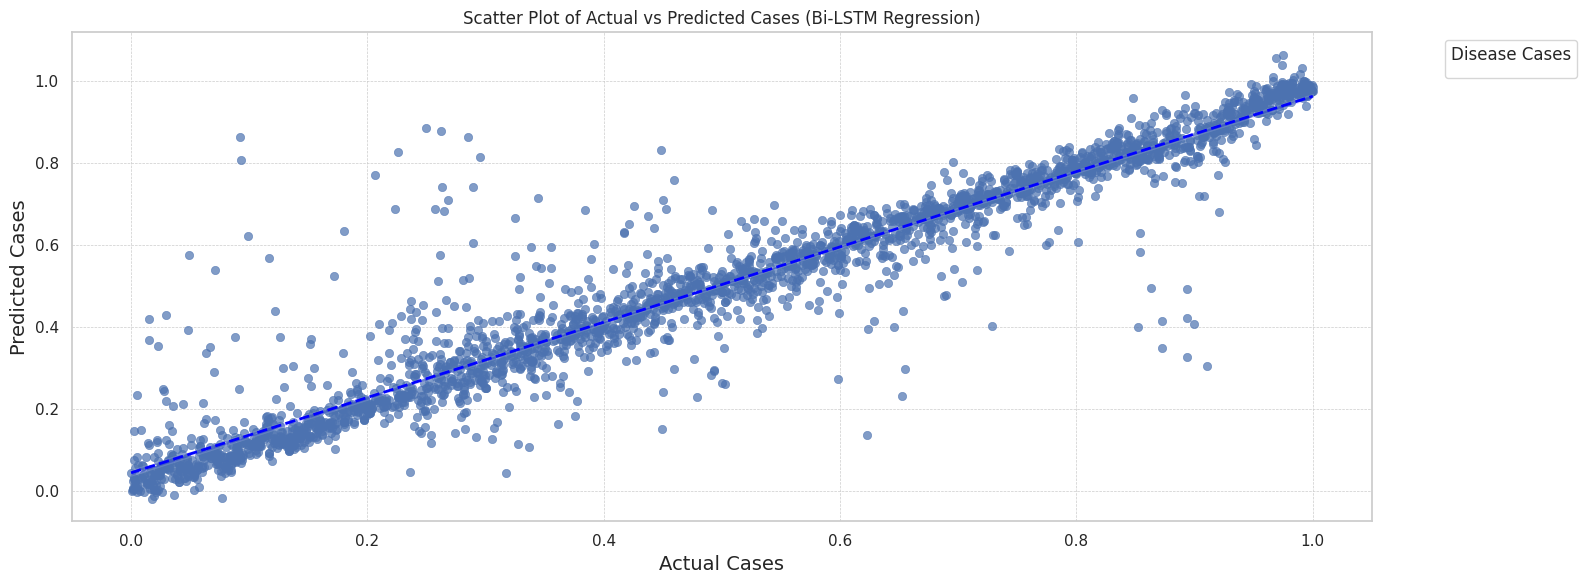

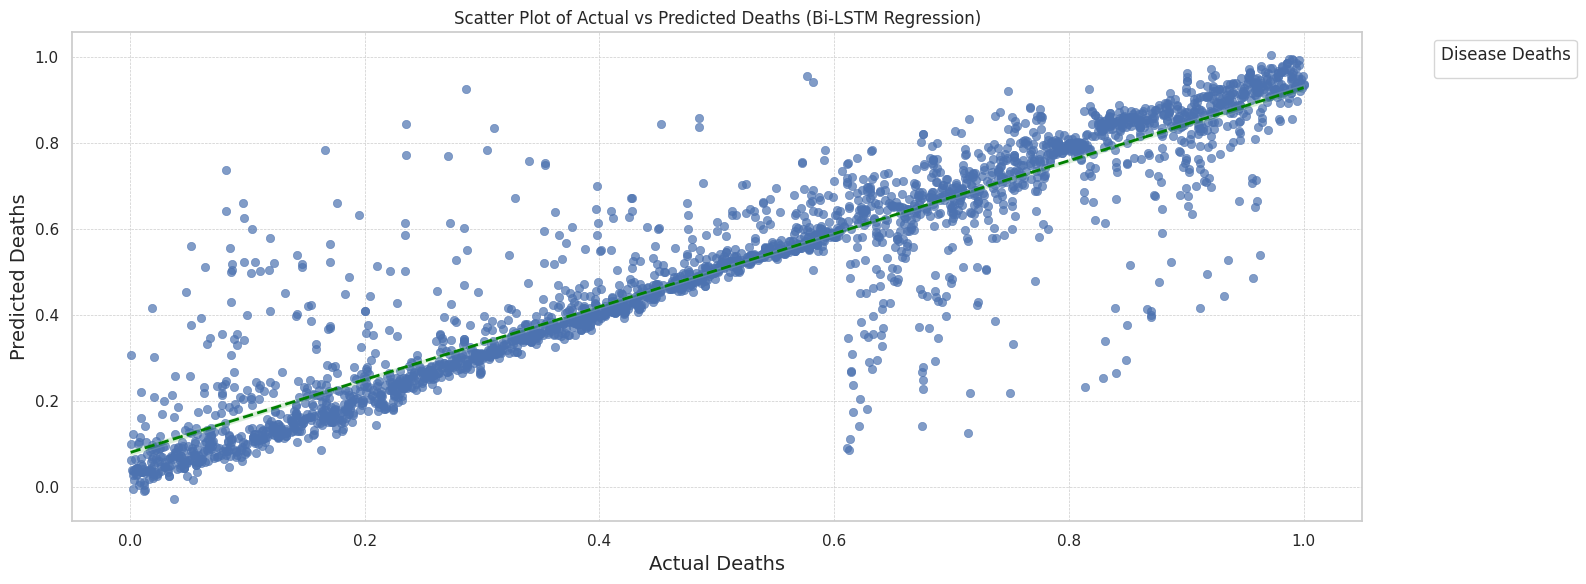

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Load the data
data = pd.read_csv("6089_source_data_2.csv")

# One-hot encode categorical variables (Type of disease, srcStateName, GENDER)
data_encoded = pd.get_dummies(data, columns=['Type of disease', 'srcStateName', 'GENDER'])

# Separate features (X) and target variables (y_cases, y_deaths)
X = data_encoded.drop(['Cases', 'Deaths'], axis=1)
y_cases = data_encoded['Cases']
y_deaths = data_encoded['Deaths']

# Split the data into training and testing sets for both cases and deaths separately
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, y_cases, y_deaths, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to fit Bi-LSTM input (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the Bi-LSTM model for cases
bilstm_cases_model = Sequential()
bilstm_cases_model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
bilstm_cases_model.add(Dropout(0.2))
bilstm_cases_model.add(Bidirectional(LSTM(32, activation='relu')))
bilstm_cases_model.add(Dropout(0.2))
bilstm_cases_model.add(Dense(1, activation='linear'))

# Compile the model
bilstm_cases_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
bilstm_cases_model.fit(X_train_scaled, y_cases_train, epochs=50, batch_size=10, verbose=1)

# Make predictions on the testing set for cases using Bi-LSTM
y_cases_pred_bilstm = bilstm_cases_model.predict(X_test_scaled).flatten()

# Calculate overall metrics for cases using Bi-LSTM
overall_mse_cases_bilstm = mean_squared_error(y_cases_test, y_cases_pred_bilstm)
overall_mae_cases_bilstm = mean_absolute_error(y_cases_test, y_cases_pred_bilstm)
overall_r2_cases_bilstm = r2_score(y_cases_test, y_cases_pred_bilstm)
overall_rmse_cases_bilstm = np.sqrt(overall_mse_cases_bilstm)

# Print overall metrics for cases using Bi-LSTM
print("Overall Metrics for Cases using Bi-LSTM Regression:")
print("Overall MSE Cases:", overall_mse_cases_bilstm)
print("Overall MAE Cases:", overall_mae_cases_bilstm)
print("Overall R^2 Cases:", overall_r2_cases_bilstm)
print("Overall RMSE Cases:", overall_rmse_cases_bilstm)

# Define the Bi-LSTM model for deaths
bilstm_deaths_model = Sequential()
bilstm_deaths_model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
bilstm_deaths_model.add(Dropout(0.2))
bilstm_deaths_model.add(Bidirectional(LSTM(32, activation='relu')))
bilstm_deaths_model.add(Dropout(0.2))
bilstm_deaths_model.add(Dense(1, activation='linear'))

# Compile the model
bilstm_deaths_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
bilstm_deaths_model.fit(X_train_scaled, y_deaths_train, epochs=50, batch_size=10, verbose=1)

# Make predictions on the testing set for deaths using Bi-LSTM
y_deaths_pred_bilstm = bilstm_deaths_model.predict(X_test_scaled).flatten()

# Calculate overall metrics for deaths using Bi-LSTM
overall_mse_deaths_bilstm = mean_squared_error(y_deaths_test, y_deaths_pred_bilstm)
overall_mae_deaths_bilstm = mean_absolute_error(y_deaths_test, y_deaths_pred_bilstm)
overall_r2_deaths_bilstm = r2_score(y_deaths_test, y_deaths_pred_bilstm)
overall_rmse_deaths_bilstm = np.sqrt(overall_mse_deaths_bilstm)

# Print overall metrics for deaths using Bi-LSTM
print("\nOverall Metrics for Deaths using Bi-LSTM Regression:")
print("Overall MSE Deaths:", overall_mse_deaths_bilstm)
print("Overall MAE Deaths:", overall_mae_deaths_bilstm)
print("Overall R^2 Deaths:", overall_r2_deaths_bilstm)
print("Overall RMSE Deaths:", overall_rmse_deaths_bilstm)

# Convert y_cases_test and y_deaths_test to DataFrame for merging
y_cases_test_df = pd.DataFrame(y_cases_test)
y_deaths_test_df = pd.DataFrame(y_deaths_test)

# Merge the test predictions and actual values for plotting
cases_results = pd.concat([y_cases_test_df.reset_index(drop=True), pd.DataFrame(y_cases_pred_bilstm, columns=['Predicted_Cases'])], axis=1)
deaths_results = pd.concat([y_deaths_test_df.reset_index(drop=True), pd.DataFrame(y_deaths_pred_bilstm, columns=['Predicted_Deaths'])], axis=1)

# Set the style and palette
sns.set(style="whitegrid")

# Scatter plot with regression line for Cases
plt.figure(figsize=(16, 6))
sns.scatterplot(data=cases_results, x='Cases', y='Predicted_Cases', alpha=0.7, edgecolor=None)
sns.regplot(data=cases_results, x='Cases', y='Predicted_Cases', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Cases (Bi-LSTM Regression)')
plt.xlabel('Actual Cases', fontsize=14)
plt.ylabel('Predicted Cases', fontsize=14)
plt.legend(title='Disease Cases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot with regression line for Deaths
plt.figure(figsize=(16, 6))
sns.scatterplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', alpha=0.7, edgecolor=None)
sns.regplot(data=deaths_results, x='Deaths', y='Predicted_Deaths', scatter=False, color='green', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.title('Scatter Plot of Actual vs Predicted Deaths (Bi-LSTM Regression)')
plt.xlabel('Actual Deaths', fontsize=14)
plt.ylabel('Predicted Deaths', fontsize=14)
plt.legend(title='Disease Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Prediction of Cases and Deaths for all Diseases for 2023**

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Read the dataset
df = pd.read_csv("6089_source_data_2.csv")

# Group the data by state and disease
grouped = df.groupby(['srcStateName', 'Type of disease'])

# Dictionary to store predictions and errors
predictions = {}

# Loop through each group (state, disease)
for (state, disease), group_df in grouped:
    # Assuming 'Yearcode' is our feature and 'Cases' and 'Deaths' are our target variables
    X = group_df[['srcYear']]
    y_cases = group_df['Cases']
    y_deaths = group_df['Deaths']

    # Initialize and train Random Forest regressors for cases and deaths
    rf_cases_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_cases_regressor.fit(X, y_cases)

    rf_deaths_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_deaths_regressor.fit(X, y_deaths)

    # Predict for the year 2023
    future_year = 2023
    future_cases = rf_cases_regressor.predict([[future_year]])[0]
    future_deaths = rf_deaths_regressor.predict([[future_year]])[0]

    # Calculate the case errors and death errors for each year
    case_errors = y_cases - rf_cases_regressor.predict(X)
    death_errors = y_deaths - rf_deaths_regressor.predict(X)

    # Calculate the mean squared error for cases and deaths
    mse_cases = mean_squared_error(y_cases, rf_cases_regressor.predict(X))
    mse_deaths = mean_squared_error(y_deaths, rf_deaths_regressor.predict(X))

    # Calculate the mean absolute error for cases and deaths
    mae_cases = mean_absolute_error(y_cases, rf_cases_regressor.predict(X))
    mae_deaths = mean_absolute_error(y_deaths, rf_deaths_regressor.predict(X))

    # Calculate the R-squared value for cases and deaths
    r2_cases = r2_score(y_cases, rf_cases_regressor.predict(X))
    r2_deaths = r2_score(y_deaths, rf_deaths_regressor.predict(X))

    # Calculate the root mean squared error for cases and deaths
    rmse_cases = np.sqrt(mse_cases)
    rmse_deaths = np.sqrt(mse_deaths)

    # Store the predictions, errors, and MSEs in the dictionary
    predictions[(state, disease)] = {
        'predicted_cases': future_cases,
        'predicted_deaths': future_deaths,
        'case_errors': case_errors,
        'death_errors': death_errors,
        'mse_cases': mse_cases,
        'mse_deaths': mse_deaths,
        'mae_cases': mae_cases,
        'mae_deaths': mae_deaths,
        'r2_cases': r2_cases,
        'r2_deaths': r2_deaths,
        'rmse_cases': rmse_cases,
        'rmse_deaths': rmse_deaths
    }

# Print the predictions, errors, and MSEs for the year 2023 in a tabular format
for key, value in predictions.items():
    state, disease = key
    predicted_cases = value['predicted_cases']
    predicted_deaths = value['predicted_deaths']
    case_errors = value['case_errors']
    death_errors = value['death_errors']
    mse_cases = value['mse_cases']
    mse_deaths = value['mse_deaths']
    mae_cases = value['mae_cases']
    mae_deaths = value['mae_deaths']
    r2_cases = value['r2_cases']
    r2_deaths = value['r2_deaths']
    rmse_cases = value['rmse_cases']
    rmse_deaths = value['rmse_deaths']

    print(f"State: {state}, Disease: {disease}")
    print("Year\tPredicted Cases\tPredicted Deaths\tCase Error\tDeath Error\tMSE Cases\tMSE Deaths\tMAE Cases\tMAE Deaths\tR^2 Cases\tR^2 Deaths\tRMSE Cases\tRMSE Deaths")
    print(f"2023\t\t{predicted_cases:.3f}\t\t{predicted_deaths:.3f}\t\t{case_errors.mean():.3f}\t\t{death_errors.mean():.3f}\t\t{mse_cases:.3f}\t\t{mse_deaths:.3f}\t\t{mae_cases:.3f}\t\t{mae_deaths:.3f}\t\t{r2_cases:.3f}\t\t{r2_deaths:.3f}\t\t{rmse_cases:.3f}\t\t{rmse_deaths:.3f}")
    print("\n")

State: Andaman and Nicobar Islands, Disease: Acute Diarrhoeal Diseases
Year	Predicted Cases	Predicted Deaths	Case Error	Death Error	MSE Cases	MSE Deaths	MAE Cases	MAE Deaths	R^2 Cases	R^2 Deaths	RMSE Cases	RMSE Deaths
2023		0.781		0.001		0.000		0.000		0.000		0.000		0.002		0.000		0.824		0.989		0.003		0.000


State: Andaman and Nicobar Islands, Disease: Acute Encephalitis Syndrome
Year	Predicted Cases	Predicted Deaths	Case Error	Death Error	MSE Cases	MSE Deaths	MAE Cases	MAE Deaths	R^2 Cases	R^2 Deaths	RMSE Cases	RMSE Deaths
2023		0.001		0.002		0.000		0.000		0.000		0.000		0.000		0.000		0.993		0.993		0.000		0.000


State: Andaman and Nicobar Islands, Disease: Acute Respiratory Infection
Year	Predicted Cases	Predicted Deaths	Case Error	Death Error	MSE Cases	MSE Deaths	MAE Cases	MAE Deaths	R^2 Cases	R^2 Deaths	RMSE Cases	RMSE Deaths
2023		0.830		0.892		0.000		0.012		0.000		0.016		0.001		0.075		0.409		0.899		0.001		0.128


State: Andaman and Nicobar Islands, Disease: Chicken Pox
Year	Predict

**Total Cases and Deaths for All Diseases**

Total Cases and Deaths by Disease:
                                  Cases      Deaths
Type of disease                                    
Acute Diarrhoeal Diseases    536.635924  395.315580
Acute Encephalitis Syndrome  149.926260  208.310745
Acute Respiratory Infection  555.335846  439.711584
Chicken Pox                  352.093863  233.379791
Chikungunya                  206.820309  353.172652
Cholera                      229.897106  274.542914
Dengue                       262.591908  223.127853
Diphtheria                   246.696295  295.821731
Encephalitis                 269.937424  337.299438
Enteric Fever(Typhoid)       463.960179  281.075588
Gonococcal Infection         291.663585  215.325322
Influenza                    164.112992  251.314158
Japanese Encephalitis        115.531892  198.789661
Kala-azar                     85.274906  148.427434
Malaria                      302.535021  235.565171
Measles                      293.657897  229.023324
Meningococcal Meningitis     

<Figure size 1400x700 with 0 Axes>

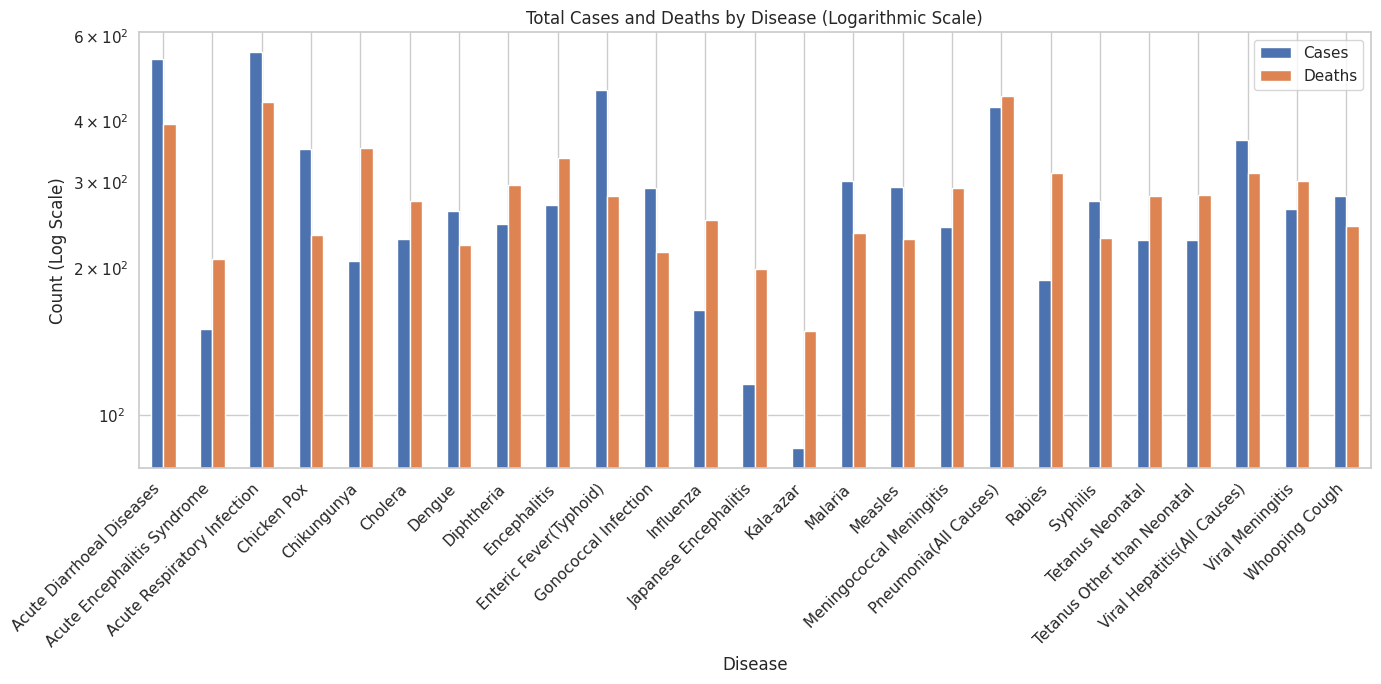

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("6089_source_data_2.csv")

# Group the data by 'Type of disease' and sum the 'Cases' and 'Deaths' columns
total_cases_deaths_by_disease = df.groupby('Type of disease')[['Cases', 'Deaths']].sum()

# Print the total cases and deaths by disease
print("Total Cases and Deaths by Disease:")
print(total_cases_deaths_by_disease)

# Plotting with logarithmic scale
plt.figure(figsize=(14, 7))
total_cases_deaths_by_disease.plot(kind='bar', logy=True, figsize=(14, 7))
plt.title('Total Cases and Deaths by Disease (Logarithmic Scale)')
plt.xlabel('Disease')
plt.ylabel('Count (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.legend(["Cases", "Deaths"])
plt.tight_layout()
plt.show()

**Disease of Major Concern**

Disease of Major Concern
                                  Cases      Deaths
Type of disease                                    
Acute Encephalitis Syndrome  149.926260  208.310745
Chikungunya                  206.820309  353.172652
Cholera                      229.897106  274.542914
Diphtheria                   246.696295  295.821731
Encephalitis                 269.937424  337.299438
Influenza                    164.112992  251.314158
Japanese Encephalitis        115.531892  198.789661
Kala-azar                     85.274906  148.427434
Meningococcal Meningitis     243.396146  291.829482
Pneumonia(All Causes)        428.406670  451.398777
Rabies                       189.350210  314.046718
Tetanus Neonatal             228.241414  281.594326
Tetanus Other than Neonatal  228.451255  282.526559
Viral Meningitis             264.821020  302.447202


<Figure size 1400x700 with 0 Axes>

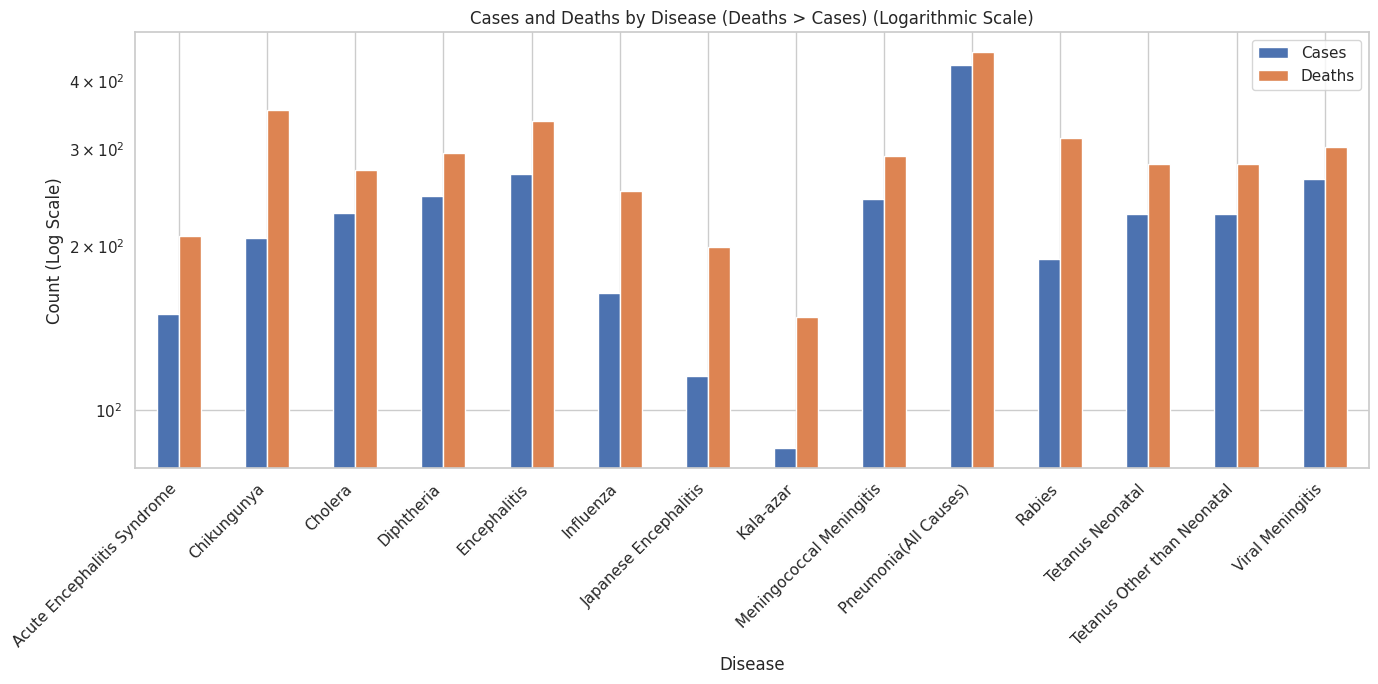

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("6089_source_data_2.csv")

# Group the data by 'Type of disease' and sum the 'Cases' and 'Deaths' columns
total_cases_deaths_by_disease = df.groupby('Type of disease')[['Cases', 'Deaths']].sum()

# Filter data to include only diseases where deaths are more than cases
filtered_data = total_cases_deaths_by_disease[total_cases_deaths_by_disease['Deaths'] > total_cases_deaths_by_disease['Cases']]

# Print the filtered cases and deaths by disease
print("Disease of Major Concern")
print(filtered_data)

# Plotting with logarithmic scale
plt.figure(figsize=(14, 7))
filtered_data.plot(kind='bar', logy=True, figsize=(14, 7))
plt.title('Cases and Deaths by Disease (Deaths > Cases) (Logarithmic Scale)')
plt.xlabel('Disease')
plt.ylabel('Count (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.legend(["Cases", "Deaths"])
plt.tight_layout()
plt.show()

**Correlation between Cases and Deaths for Each Disease**

Acute Diarrhoeal Diseases: 0.45
Acute Encephalitis Syndrome: 0.81
Acute Respiratory Infection: 0.38
Chicken Pox: 0.32
Chikungunya: 0.40
Cholera: 0.87
Dengue: 0.53
Diphtheria: 0.75
Encephalitis: 0.61
Enteric Fever(Typhoid): 0.42
Gonococcal Infection: 0.34
Influenza: 0.84
Japanese Encephalitis: 0.90
Kala-azar: 0.58
Malaria: 0.59
Measles: 0.44
Meningococcal Meningitis: 0.69
Pneumonia(All Causes): 0.63
Rabies: 0.82
Syphilis: 0.55
Tetanus Neonatal: 0.87
Tetanus Other than Neonatal: 0.69
Viral Hepatitis(All Causes): 0.45
Viral Meningitis: 0.58
Whooping Cough: 0.56


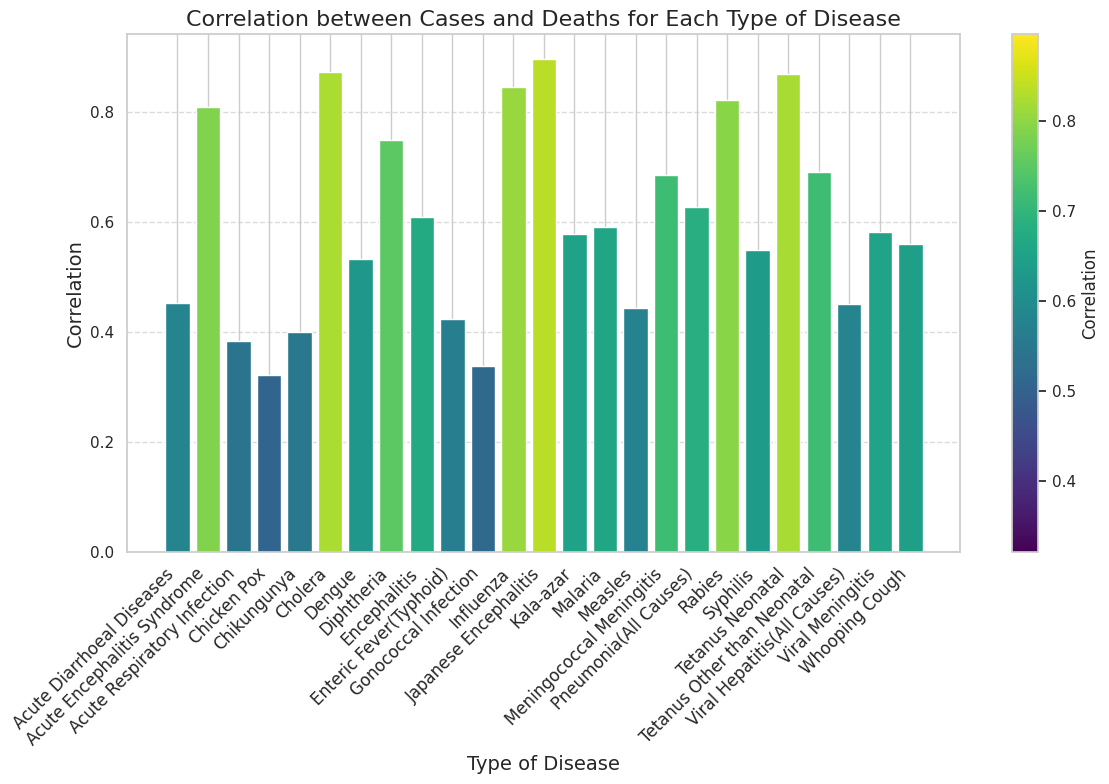

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
selected_df = pd.read_csv("6089_source_data_2.csv")

# Group the data by 'Type of disease' and calculate the correlation between 'Cases' and 'Deaths' for each group
correlation_by_disease = selected_df.groupby('Type of disease')[['Cases', 'Deaths']].corr().iloc[0::2,-1]

# Reset index to make it a DataFrame
correlation_by_disease = correlation_by_disease.reset_index()

# Rename the column containing correlation values
correlation_by_disease.rename(columns={correlation_by_disease.columns[-1]: 'Correlation'}, inplace=True)

# Remove the 'level_1' column
correlation_by_disease.drop(columns='level_1', inplace=True)

# Set up plot
plt.figure(figsize=(12, 8))

# Plot using a colormap
colors = plt.cm.viridis(correlation_by_disease['Correlation'])  # Use 'viridis' colormap, you can choose any other colormap

bars = plt.bar(correlation_by_disease['Type of disease'], correlation_by_disease['Correlation'], color=colors)

# Title and labels
plt.title('Correlation between Cases and Deaths for Each Type of Disease', fontsize=16)
plt.xlabel('Type of Disease', fontsize=14)
plt.ylabel('Correlation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show color bar for reference
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=correlation_by_disease['Correlation'].min(), vmax=correlation_by_disease['Correlation'].max()))
sm.set_array([])  # dummy empty array
cbar = plt.colorbar(sm, ax=plt.gca())  # Specify the Axes object
cbar.set_label('Correlation', fontsize=12)

# Show correlation values on the output
for i, (disease, correlation) in correlation_by_disease.iterrows():
    print(f"{disease}: {correlation:.2f}")

# Show plot
plt.tight_layout()
plt.show()

**Correlation between Diseases and Cases for Different States**

Correlation Matrix for Cases and Deaths by Disease and State:
                            Andaman and Nicobar Islands Andhra Pradesh  \
Acute Diarrhoeal Diseases                     -0.647173      -0.872185   
Acute Encephalitis Syndrome                         1.0      -0.035838   
Acute Respiratory Infection                     0.00141      -0.777602   
Chicken Pox                                    -0.29347       0.737212   
Chikungunya                                    0.966345       0.997657   
Cholera                                             1.0       0.886392   
Dengue                                        -0.276433      -0.150289   
Diphtheria                                          1.0      -0.750638   
Encephalitis                                    0.66726       0.784547   
Enteric Fever(Typhoid)                        -0.505999       0.049931   
Gonococcal Infection                           0.939427      -0.773598   
Influenza                                      0.6

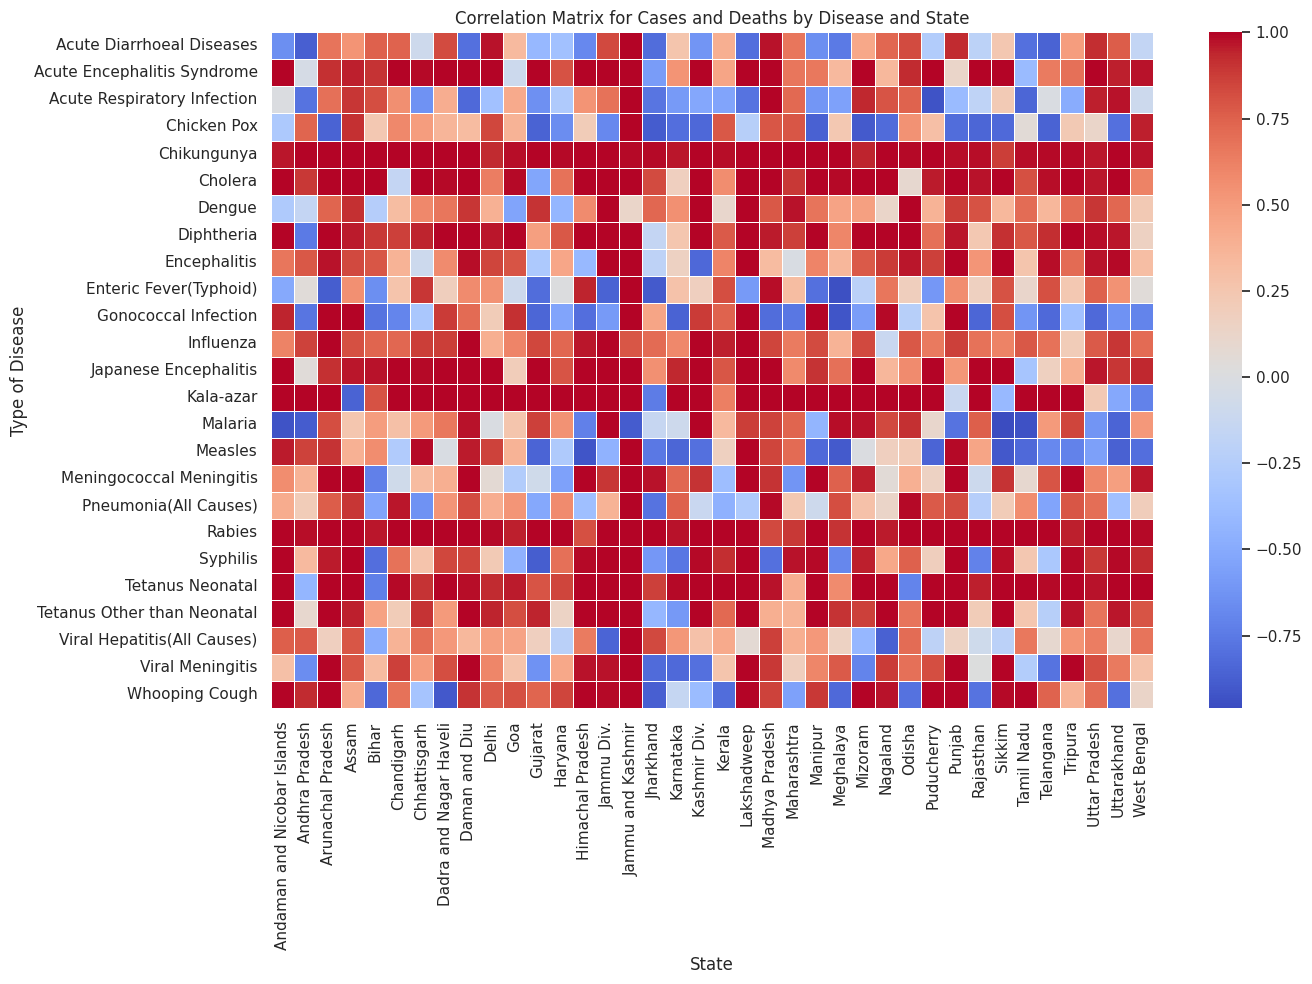

In [31]:
import pandas as pd

selected_df = pd.read_csv("6089_source_data_2.csv")

# Group the data by 'Type of disease' and 'State'
grouped_data = selected_df.groupby(['Type of disease', 'srcStateName'])

# Initialize an empty matrix to store correlation values
correlation_matrix = pd.DataFrame(index=selected_df['Type of disease'].unique(), columns=selected_df['srcStateName'].unique())

# Calculate correlation coefficients for each disease in each state
for (disease, state), group in grouped_data:
    correlation = group['Cases'].corr(group['Deaths'])
    correlation_matrix.loc[disease, state] = correlation

# Print the correlation matrix
print("Correlation Matrix for Cases and Deaths by Disease and State:")
print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix.astype(float), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Cases and Deaths by Disease and State')
plt.xlabel('State')
plt.ylabel('Type of Disease')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Total Burden (Cases + Deaths) for each Disease**

                Type of disease       Cases      Deaths  Total Burden
0   Acute Respiratory Infection  555.335846  439.711584    995.047429
1     Acute Diarrhoeal Diseases  536.635924  395.315580    931.951504
2         Pneumonia(All Causes)  428.406670  451.398777    879.805447
3        Enteric Fever(Typhoid)  463.960179  281.075588    745.035768
4   Viral Hepatitis(All Causes)  366.675674  313.241627    679.917301
5                  Encephalitis  269.937424  337.299438    607.236863
6                   Chicken Pox  352.093863  233.379791    585.473654
7              Viral Meningitis  264.821020  302.447202    567.268222
8                   Chikungunya  206.820309  353.172652    559.992960
9                    Diphtheria  246.696295  295.821731    542.518026
10                      Malaria  302.535021  235.565171    538.100192
11     Meningococcal Meningitis  243.396146  291.829482    535.225628
12               Whooping Cough  281.255564  244.071891    525.327455
13                  

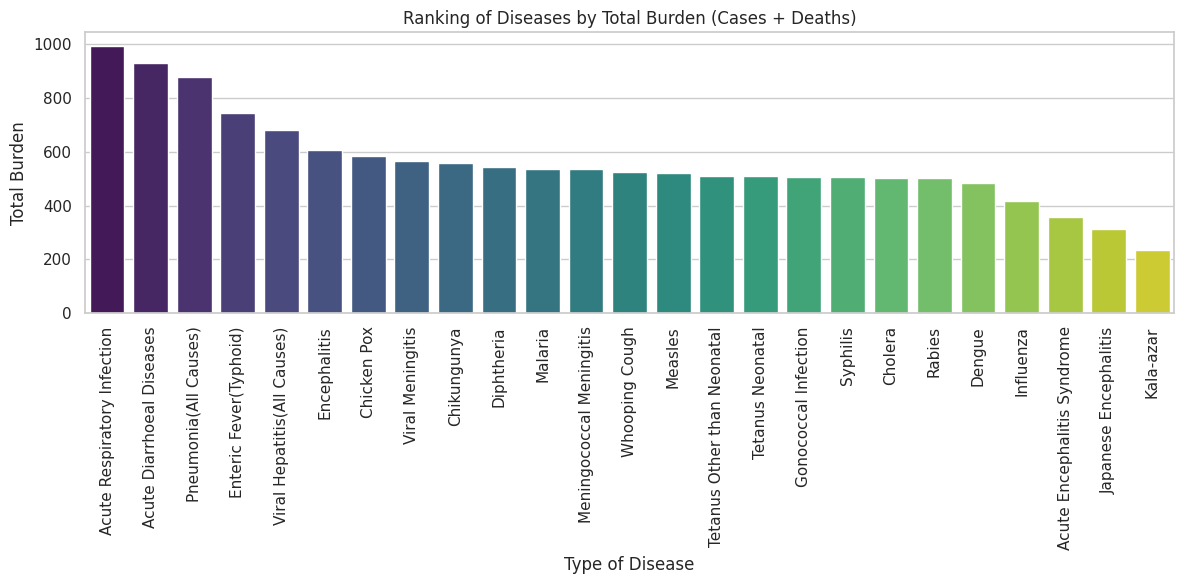

In [32]:
import pandas as pd

# Load the data
df = pd.read_csv("6089_source_data_2.csv")

# Calculate total cases and deaths for each disease
disease_totals = df.groupby('Type of disease')[['Cases', 'Deaths']].sum().reset_index()

# Calculate the total burden (cases + deaths) for each disease
disease_totals['Total Burden'] = disease_totals['Cases'] + disease_totals['Deaths']

# Rank diseases based on the total burden
disease_totals = disease_totals.sort_values(by='Total Burden', ascending=False).reset_index(drop=True)

# Display the ranking
print(disease_totals)

# Plotting the ranking
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Type of disease', y='Total Burden', data=disease_totals, palette='viridis')
plt.title('Ranking of Diseases by Total Burden (Cases + Deaths)')
plt.xlabel('Type of Disease')
plt.ylabel('Total Burden')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Proportionate Mortality for Each Disease**

Type of disease
Acute Diarrhoeal Diseases      5.621666
Acute Encephalitis Syndrome    2.962326
Acute Respiratory Infection    6.253009
Chicken Pox                    3.318825
Chikungunya                    5.022364
Cholera                        3.904194
Dengue                         3.173035
Diphtheria                     4.206794
Encephalitis                   4.796636
Enteric Fever(Typhoid)         3.997093
Gonococcal Infection           3.062078
Influenza                      3.573865
Japanese Encephalitis          2.826929
Kala-azar                      2.110743
Malaria                        3.349903
Measles                        3.256873
Meningococcal Meningitis       4.150021
Pneumonia(All Causes)          6.419209
Rabies                         4.465966
Syphilis                       3.279870
Tetanus Neonatal               4.004470
Tetanus Other than Neonatal    4.017727
Viral Hepatitis(All Causes)    4.454517
Viral Meningitis               4.301013
Whooping Cough          

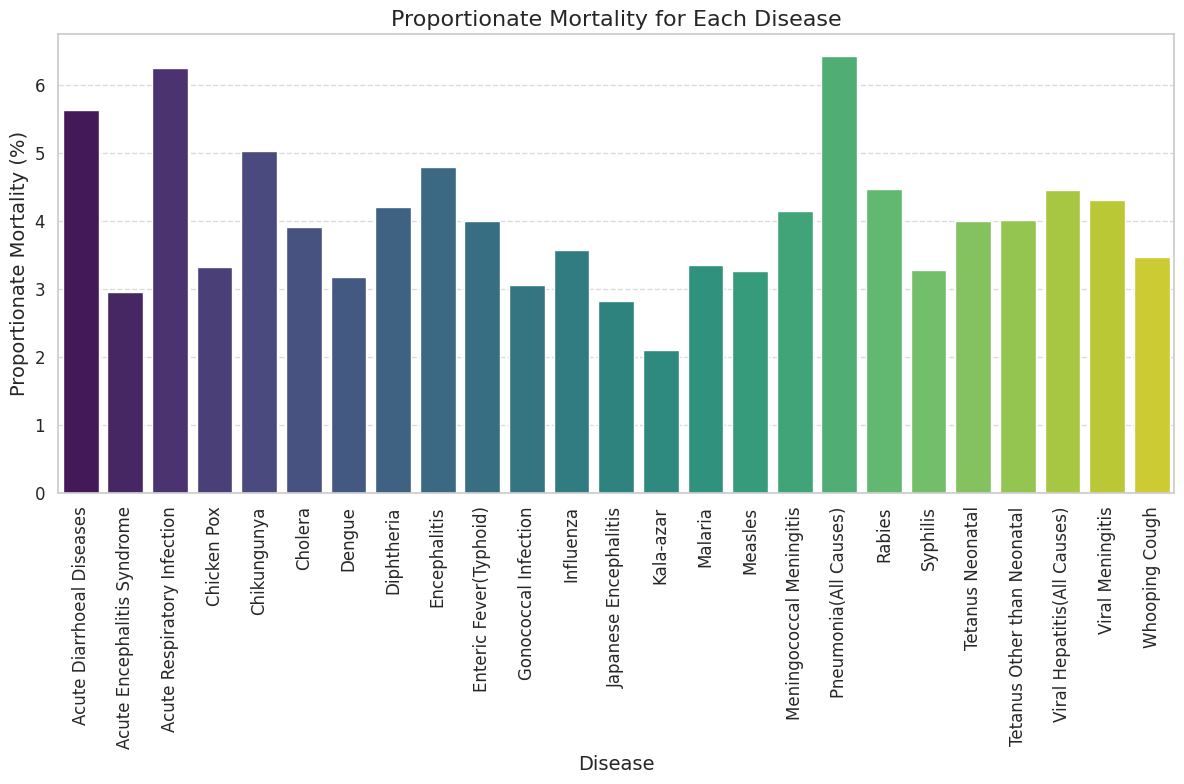

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("6089_source_data_2.csv")

# Group the data by 'Type of disease' and sum the 'Deaths' column for each disease
disease_deaths = df.groupby('Type of disease')['Deaths'].sum()

# Calculate total deaths across all diseases
total_deaths_all_diseases = df['Deaths'].sum()

# Calculate proportionate mortality for each disease
proportionate_mortality = (disease_deaths / total_deaths_all_diseases) * 100

# Print
print(proportionate_mortality)

# Plotting
plt.figure(figsize=(12, 8))

# Plot proportionate mortality for each disease
sns.barplot(x=proportionate_mortality.index, y=proportionate_mortality.values, palette='viridis')
plt.title("Proportionate Mortality for Each Disease", fontsize=16)
plt.xlabel("Disease", fontsize=14)
plt.ylabel("Proportionate Mortality (%)", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Top 3 States by Cases and Deaths**

In [34]:
import pandas as pd

# Read the dataset
df = pd.read_csv("6089_source_data_2.csv")

# Group the data by 'State' and 'Type of disease'
grouped_data = df.groupby(['srcStateName', 'Type of disease'])

# Calculate the sum of 'Cases' and 'Deaths' for each group
agg_data = grouped_data.agg({'Cases': 'sum', 'Deaths': 'sum'}).reset_index()

# Iterate over each disease
for disease in agg_data['Type of disease'].unique():
    print(f"\nDisease: {disease}")

    # Filter data for the current disease
    disease_data = agg_data[agg_data['Type of disease'] == disease]

    # Sort the data by cases and deaths
    sorted_data_cases = disease_data.sort_values(by='Cases', ascending=False).head(3)
    sorted_data_deaths = disease_data.sort_values(by='Deaths', ascending=False).head(3)

    # Print the top 3 states for cases and deaths
    print("\nTop 3 States by Cases:")
    print(sorted_data_cases[['srcStateName', 'Cases']])

    print("\nTop 3 States by Deaths:")
    print(sorted_data_deaths[['srcStateName', 'Deaths']])

    print()
    print("-------------------------------------")
    print()


Disease: Acute Diarrhoeal Diseases

Top 3 States by Cases:
       srcStateName      Cases
925     West Bengal  15.856005
25   Andhra Pradesh  15.724881
875   Uttar Pradesh  15.700562

Top 3 States by Deaths:
      srcStateName     Deaths
875  Uttar Pradesh  15.686269
75           Assam  15.620493
925    West Bengal  15.537794

-------------------------------------


Disease: Acute Encephalitis Syndrome

Top 3 States by Cases:
      srcStateName     Cases
926    West Bengal  8.636351
76           Assam  8.562540
876  Uttar Pradesh  8.496551

Top 3 States by Deaths:
    srcStateName     Deaths
76         Assam  11.876058
926  West Bengal  11.751476
101        Bihar  11.640333

-------------------------------------


Disease: Acute Respiratory Infection

Top 3 States by Cases:
    srcStateName      Cases
752    Rajasthan  15.973690
477       Kerala  15.972765
927  West Bengal  15.958046

Top 3 States by Deaths:
       srcStateName     Deaths
927     West Bengal  15.900235
877   Uttar Pra

**Top 3 Diseases by Cases and Deaths**

In [35]:
# Read the dataset
selected_df = pd.read_csv("6089_source_data_2.csv")

# Group the data by 'State' and 'Type of disease'
grouped_data_state = selected_df.groupby(['srcStateName', 'Type of disease'])

# Calculate the sum of 'Cases' and 'Deaths' for each group
agg_data_state = grouped_data_state.agg({'Cases': 'sum', 'Deaths': 'sum'}).reset_index()

# Iterate over each state
for state in agg_data_state['srcStateName'].unique():
    print(f"\nState: {state}")

    # Filter data for the current state
    state_data = agg_data_state[agg_data_state['srcStateName'] == state]

    # Sort the data by cases and deaths
    sorted_data_cases = state_data.sort_values(by='Cases', ascending=False).head(3)
    sorted_data_deaths = state_data.sort_values(by='Deaths', ascending=False).head(3)

    # Print the top 3 diseases for cases and deaths
    print("\nTop 3 Diseases by Cases:")
    print(sorted_data_cases[['Type of disease', 'Cases']])

    print("\nTop 3 Diseases by Deaths:")
    print(sorted_data_deaths[['Type of disease', 'Deaths']])

    print()
    print("-------------------------------------")
    print()


State: Andaman and Nicobar Islands

Top 3 Diseases by Cases:
               Type of disease      Cases
2  Acute Respiratory Infection  13.267013
0    Acute Diarrhoeal Diseases  12.573917
9       Enteric Fever(Typhoid)   9.764133

Top 3 Diseases by Deaths:
             Type of disease     Deaths
17     Pneumonia(All Causes)  13.400484
16  Meningococcal Meningitis  10.304985
4                Chikungunya   9.614947

-------------------------------------


State: Andhra Pradesh

Top 3 Diseases by Cases:
                Type of disease      Cases
27  Acute Respiratory Infection  15.918225
25    Acute Diarrhoeal Diseases  15.724881
34       Enteric Fever(Typhoid)  14.992178

Top 3 Diseases by Deaths:
                Type of disease     Deaths
27  Acute Respiratory Infection  15.845979
42        Pneumonia(All Causes)  15.811704
25    Acute Diarrhoeal Diseases  15.244187

-------------------------------------


State: Arunachal Pradesh

Top 3 Diseases by Cases:
                Type of disease

**Comparison of Cases and Deaths by Disease Type and State**

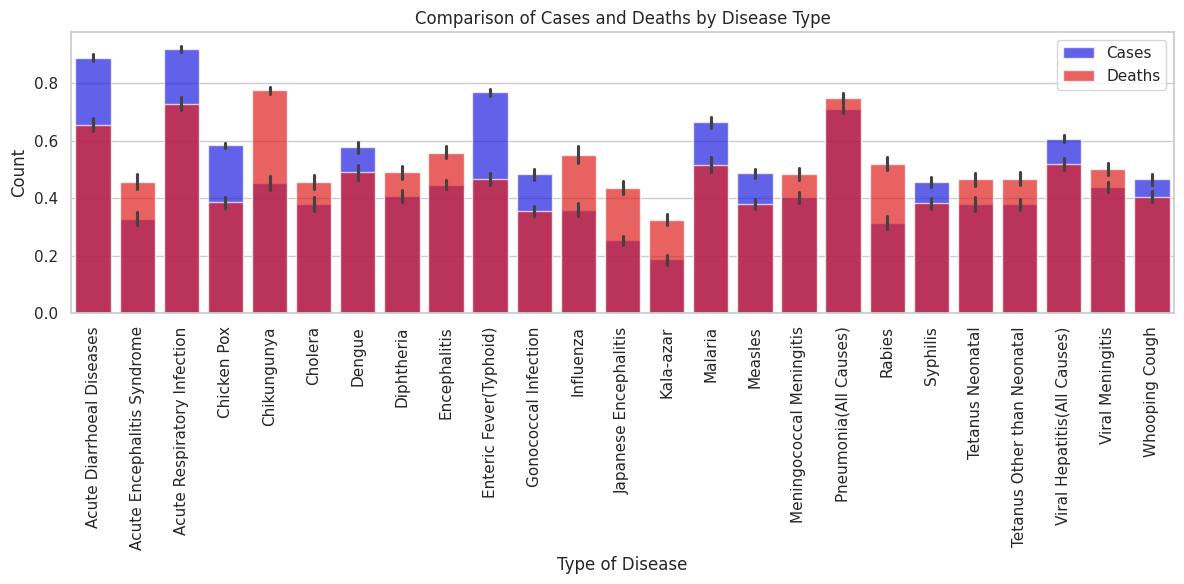

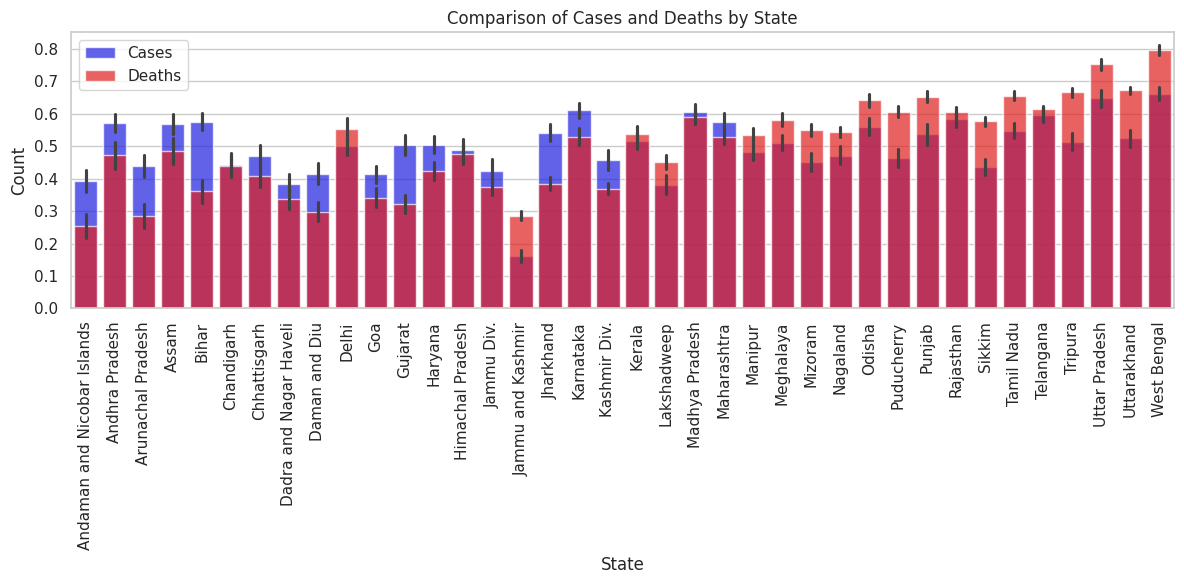

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("6089_source_data_2.csv")

# Comparing Cases and Deaths between different types of diseases
plt.figure(figsize=(12, 6))
sns.barplot(x='Type of disease', y='Cases', data=df, color='blue', alpha=0.7, label='Cases')
sns.barplot(x='Type of disease', y='Deaths', data=df, color='red', alpha=0.7, label='Deaths')
plt.title('Comparison of Cases and Deaths by Disease Type')
plt.xlabel('Type of Disease')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Comparing Cases and Deaths between different states
plt.figure(figsize=(12, 6))
sns.barplot(x='srcStateName', y='Cases', data=df, color='blue', alpha=0.7, label='Cases')
sns.barplot(x='srcStateName', y='Deaths', data=df, color='red', alpha=0.7, label='Deaths')
plt.title('Comparison of Cases and Deaths by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Trend of Cases and Deaths over Years**

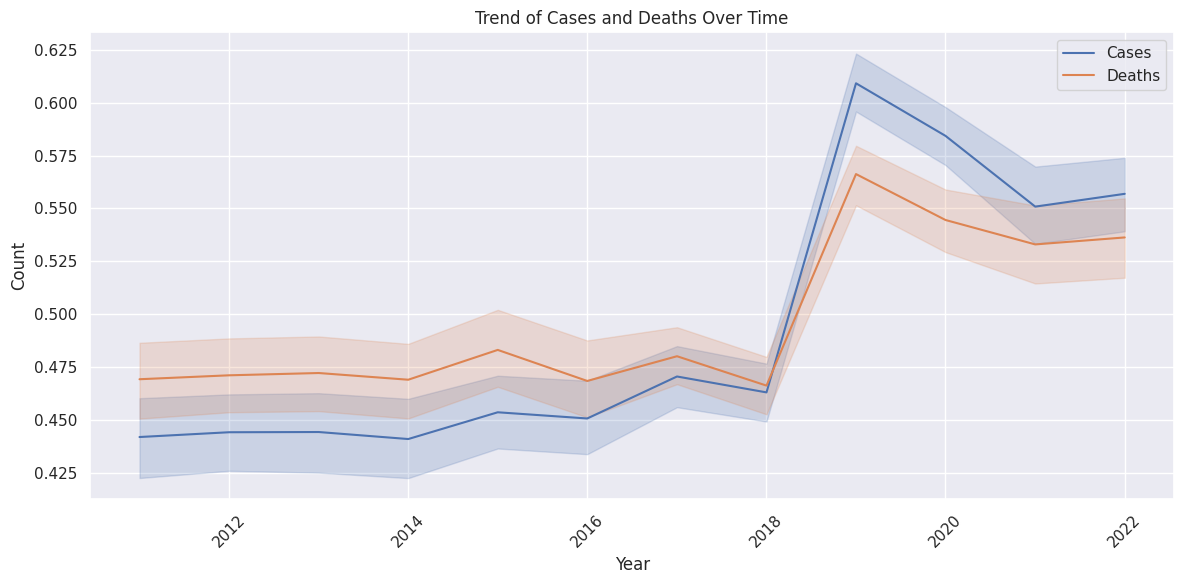

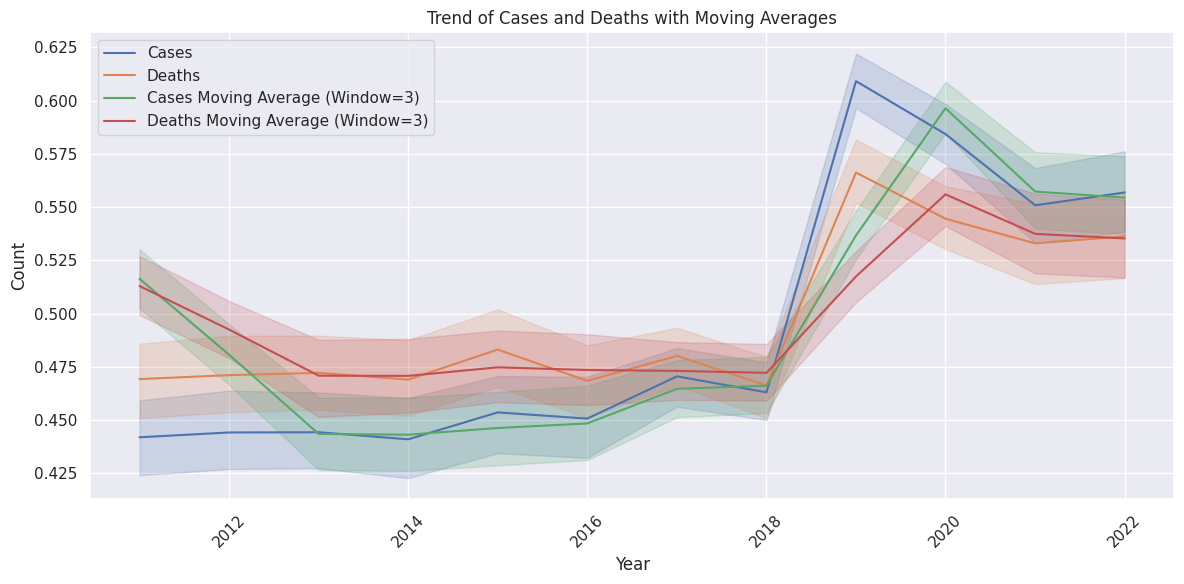

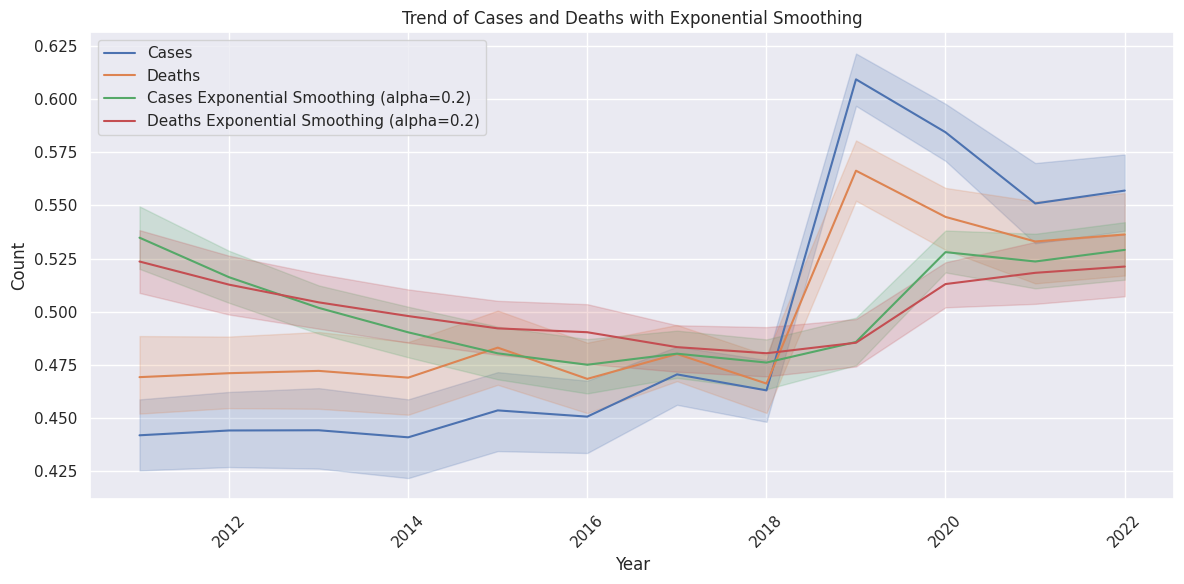

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialS
moothing
import warnings

# Load the data
try:
    df = pd.read_csv("6089_source_data_2.csv")
except FileNotFoundError:
    raise FileNotFoundError("The file final_data.csv was not found.")
except pd.errors.EmptyDataError:
    raise ValueError("The file final_data.csv is empty.")
except pd.errors.ParserError:
    raise ValueError("The file final_data.csv could not be parsed.")

# Convert 'Yearcode' to datetime if not already
df['srcYear'] = pd.to_datetime(df['srcYear'], format='%Y')

# Set 'Yearcode' as the index
df.set_index('srcYear', inplace=True)

# Plot the trend of Cases and Deaths over time
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df['Cases'], label='Cases')
sns.lineplot(data=df['Deaths'], label='Deaths')
plt.title('Trend of Cases and Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Moving averages
window_size = 3  # Define the window size for moving averages

# Calculate moving averages for Cases and Deaths
df['Cases_MA'] = df['Cases'].rolling(window=window_size).mean()
df['Deaths_MA'] = df['Deaths'].rolling(window=window_size).mean()

# Plot the trend of Cases and Deaths with moving averages
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Cases'], label='Cases')
sns.lineplot(data=df['Deaths'], label='Deaths')
sns.lineplot(data=df['Cases_MA'], label=f'Cases Moving Average (Window={window_size})')
sns.lineplot(data=df['Deaths_MA'], label=f'Deaths Moving Average (Window={window_size})')
plt.title('Trend of Cases and Deaths with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exponential smoothing
alpha = 0.2  # Define the smoothing parameter

# Suppress warnings
warnings.filterwarnings("ignore")

# Apply exponential smoothing on Cases and Deaths
try:
    model_cases = SimpleExpSmoothing(df['Cases']).fit(smoothing_level=alpha)
    model_deaths = SimpleExpSmoothing(df['Deaths']).fit(smoothing_level=alpha)

    # Get the smoothed values
    df['Cases_ES'] = model_cases.fittedvalues
    df['Deaths_ES'] = model_deaths.fittedvalues

    # Plot the trend of Cases and Deaths with exponential smoothing
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df['Cases'], label='Cases')
    sns.lineplot(data=df['Deaths'], label='Deaths')
    sns.lineplot(data=df['Cases_ES'], label=f'Cases Exponential Smoothing (alpha={alpha})')
    sns.lineplot(data=df['Deaths_ES'], label=f'Deaths Exponential Smoothing (alpha={alpha})')
    plt.title('Trend of Cases and Deaths with Exponential Smoothing')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

**Total Cases and Deaths**

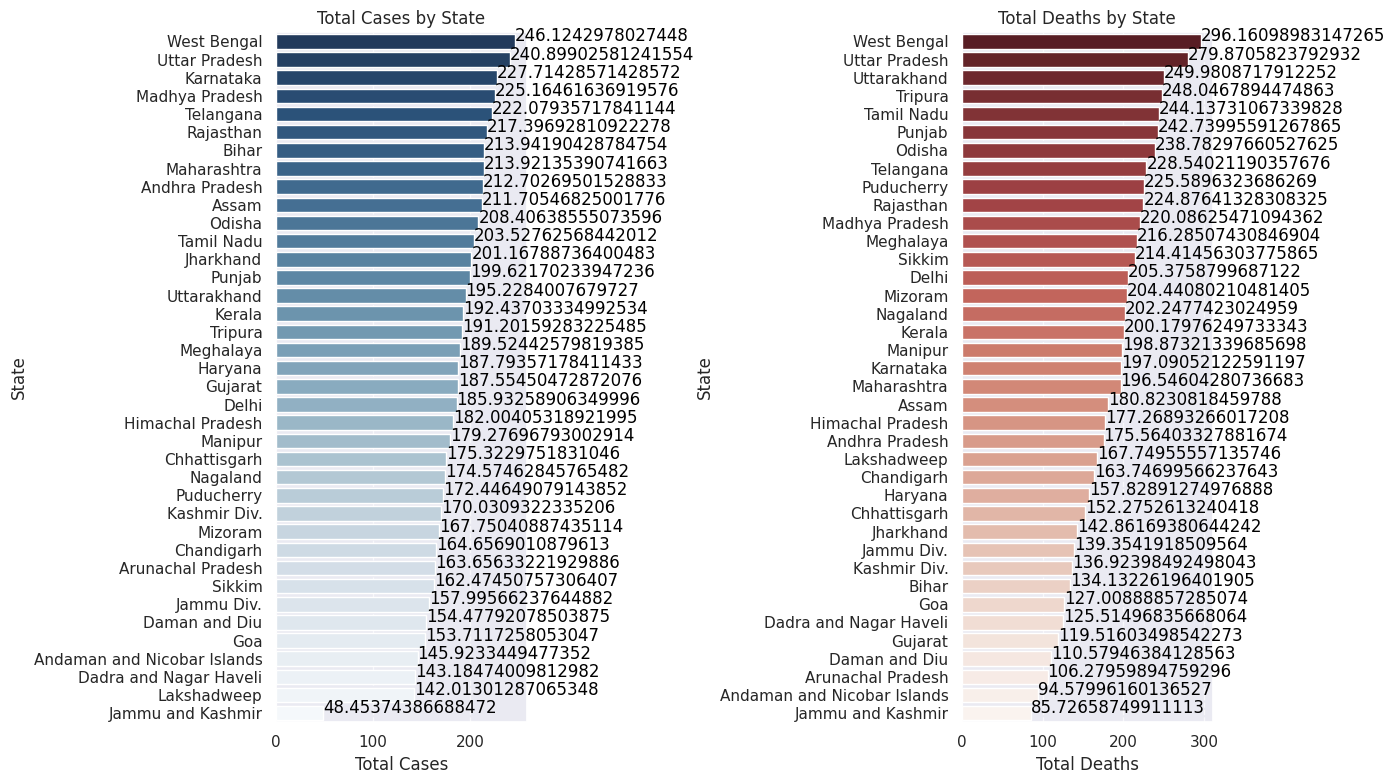

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('6089_source_data_2.csv')

# Aggregate the data by State
statewise_data = df.groupby('srcStateName').agg({'Cases': 'sum', 'Deaths': 'sum'}).reset_index()

# Sort the data by the number of cases and deaths
statewise_data_cases = statewise_data.sort_values(by='Cases', ascending=False)
statewise_data_deaths = statewise_data.sort_values(by='Deaths', ascending=False)

# Define colors for cases and deaths with reversed order and fixed saturation
palette_cases = sns.color_palette("Blues_r", len(statewise_data_cases), desat=0.7)
palette_deaths = sns.color_palette("Reds_r", len(statewise_data_deaths), desat=0.7)

# Plotting bar plots using seaborn
plt.figure(figsize=(14, 8))

# Bar plot for Cases
plt.subplot(1, 2, 1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cases_heatmap = sns.barplot(x='Cases', y='srcStateName', data=statewise_data_cases, palette=palette_cases, legend=False)
    for index, value in enumerate(statewise_data_cases['Cases']):
        plt.text(value, index, str(value), color='black', ha="left")
plt.title('Total Cases by State')
plt.xlabel('Total Cases')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Bar plot for Deaths
plt.subplot(1, 2, 2)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    deaths_heatmap = sns.barplot(x='Deaths', y='srcStateName', data=statewise_data_deaths, palette=palette_deaths, legend=False)
    for index, value in enumerate(statewise_data_deaths['Deaths']):
        plt.text(value, index, str(value), color='black', ha="left")
plt.title('Total Deaths by State')
plt.xlabel('Total Deaths')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
